In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.interpolate import CubicSpline,interp1d,InterpolatedUnivariateSpline
import time

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.interpolate import CubicSpline

# Model parameters
gamma = 0.5
beta = 0.99
alpha_c = 0.40
alpha_i = 0.50
delta = 0.076
k0 = 10.0

# Numerical parameters
k_l = 5.0
k_u = 100.0
tol = 1e-6
itermax = 2000

# Counter variables
TT = 360
grid_res = 500
verbose = False
n_err = 10000

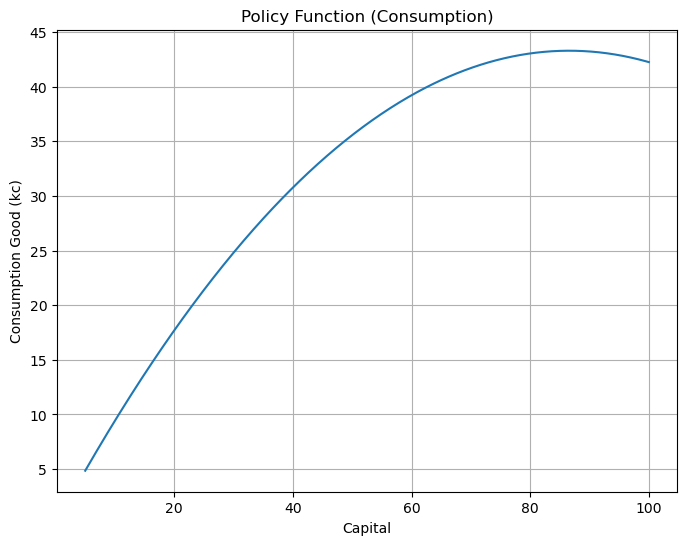

C:\Users\febbi\AppData\Local\Temp\ipykernel_35568\4014960294.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  foc = x_in - (beta * (1-delta + alpha_i * (k_plus - kc_plus) ** (alpha_i-1)) * (x_in / kc_plus) ** (1 - alpha_c) * ((k_plus - kc_plus) / (grid_k[i] - x_in)) ** (1 - alpha_i)) ** (-gamma / alpha_c) * kc_plus


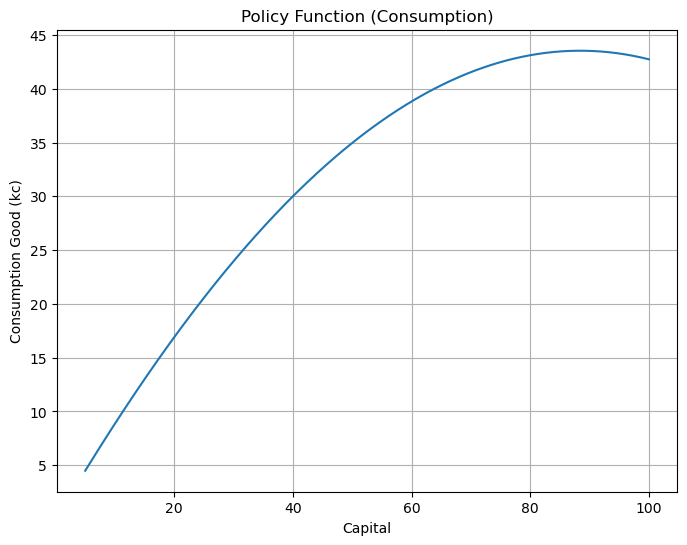

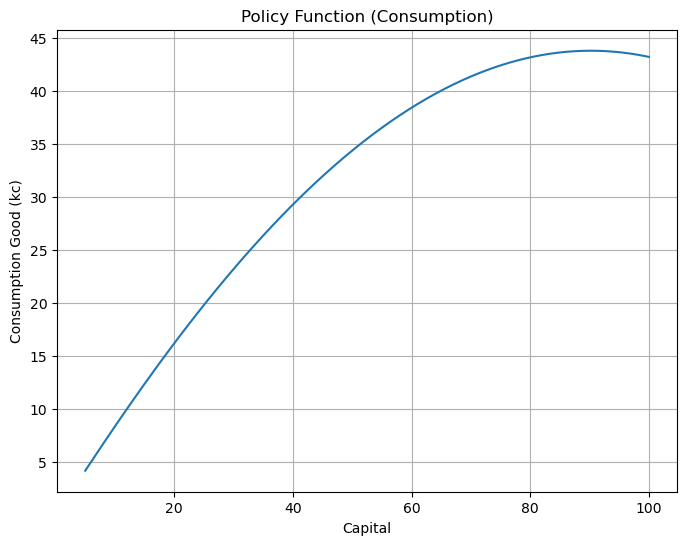

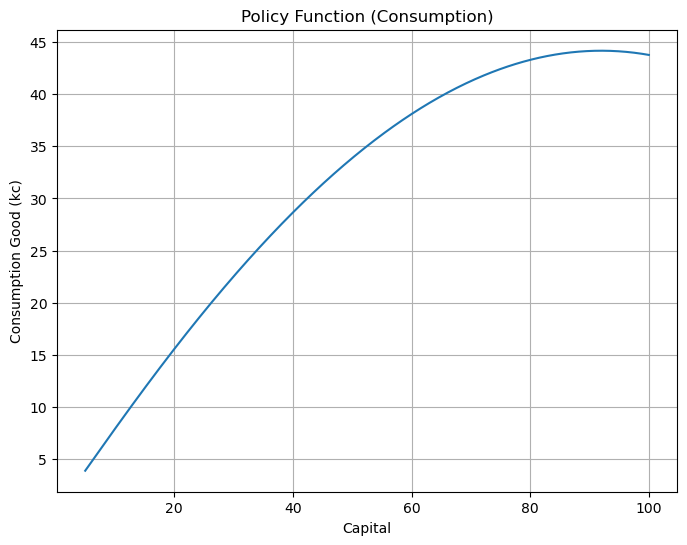

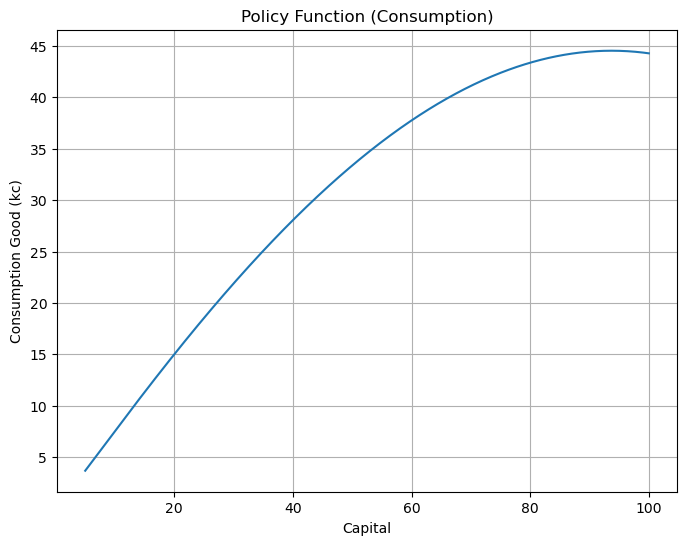

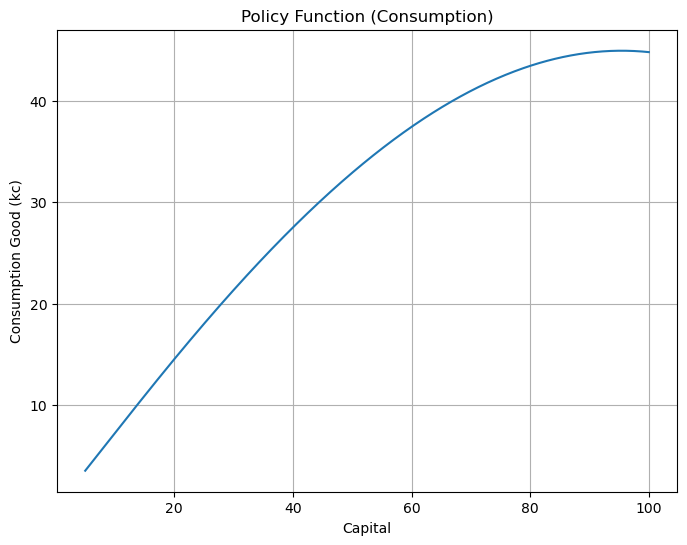

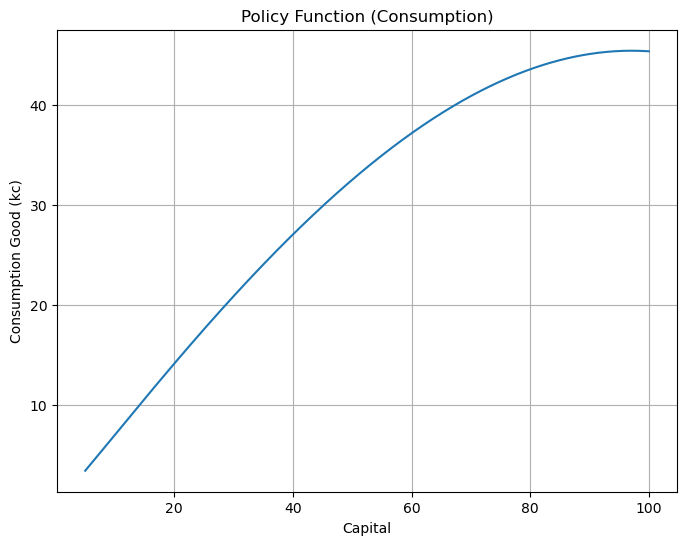

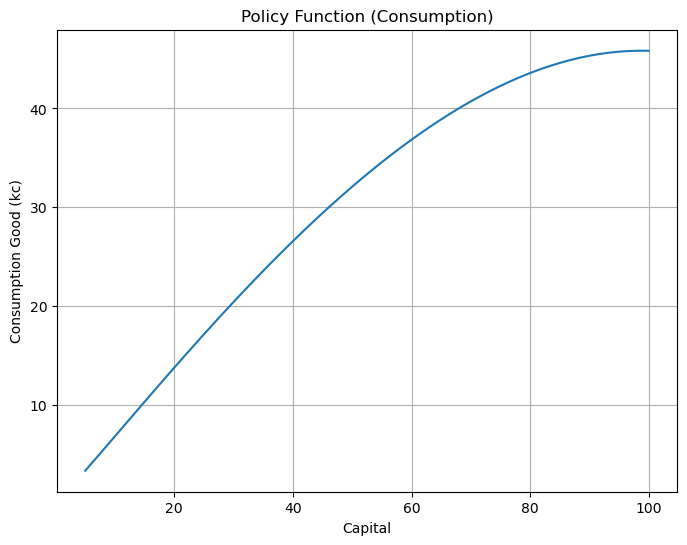

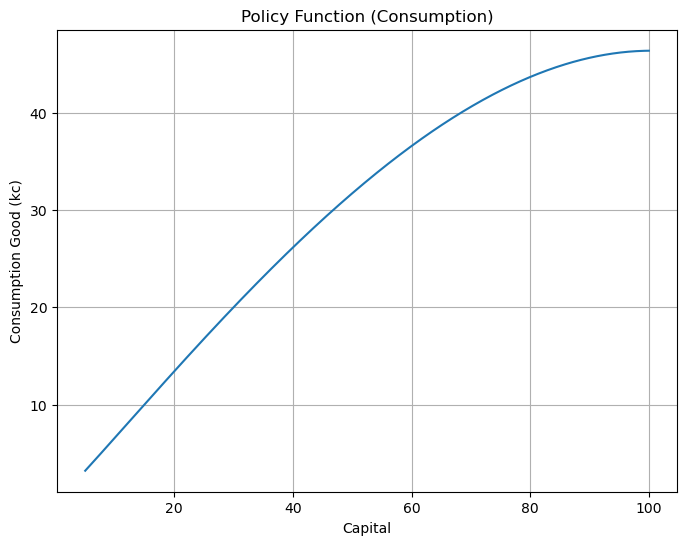

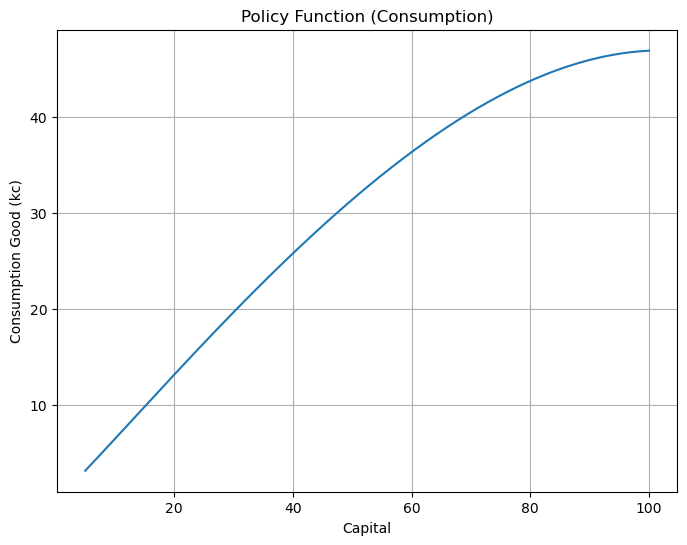

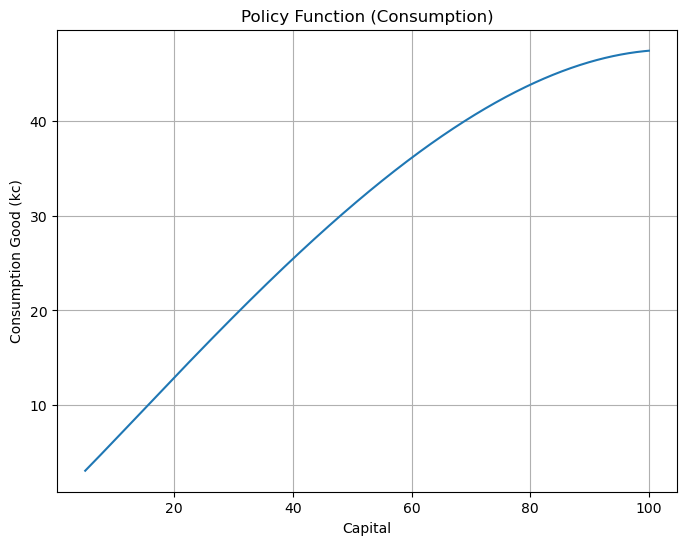

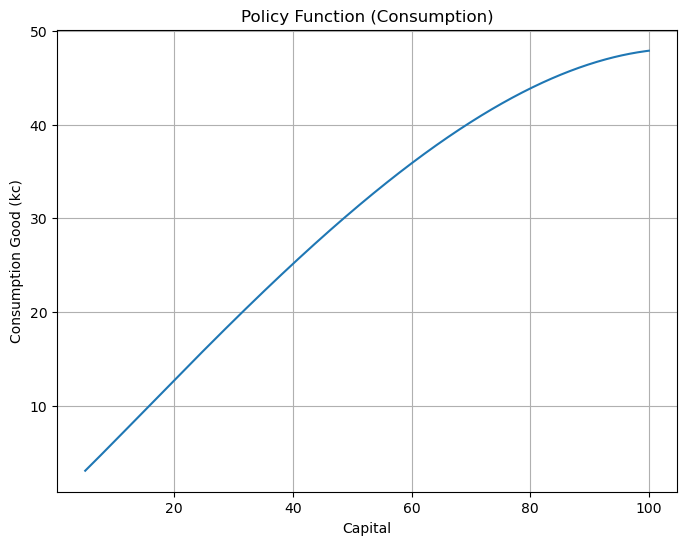

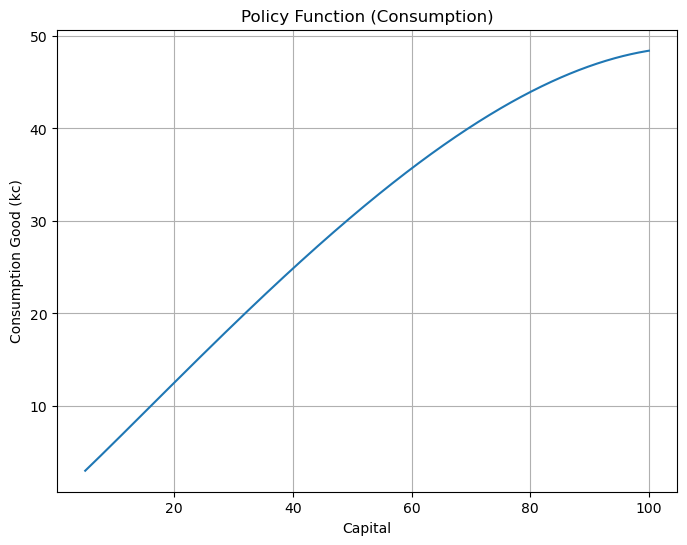

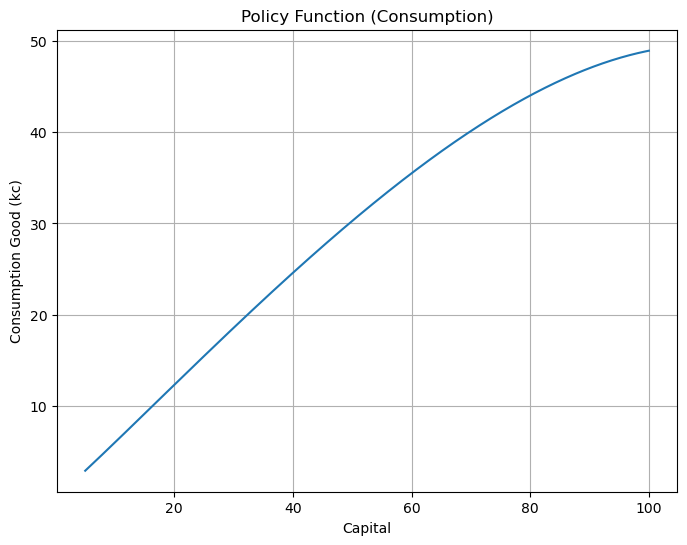

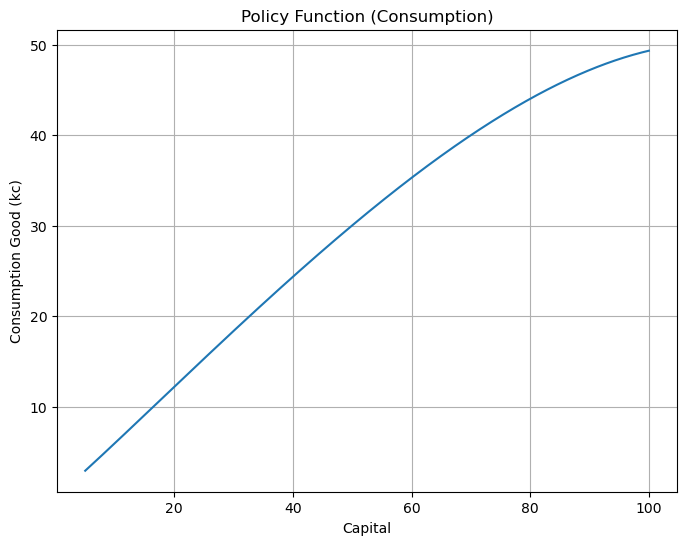

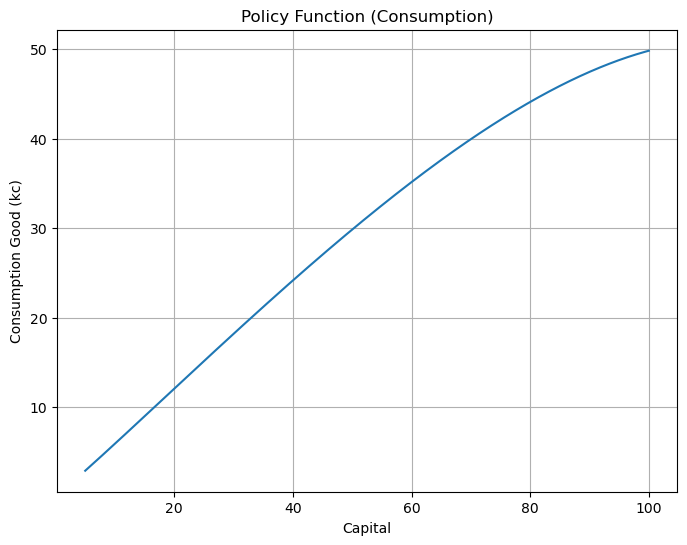

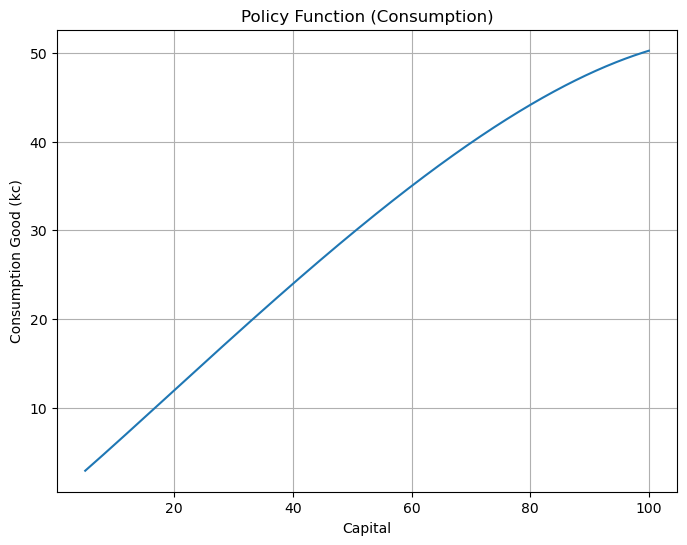

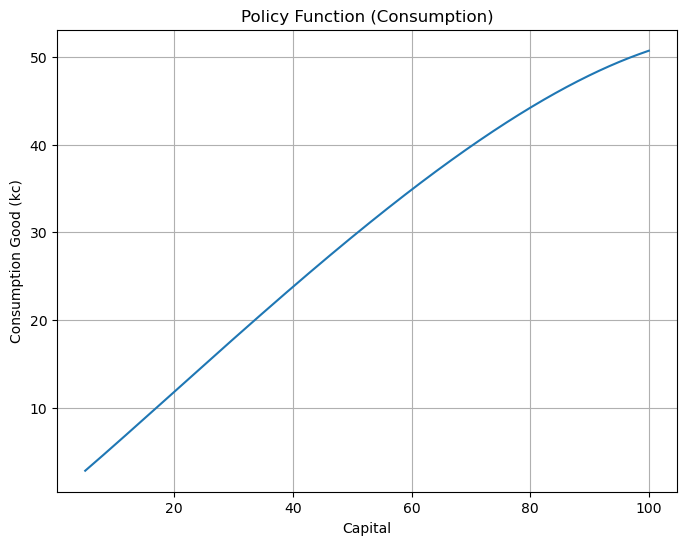

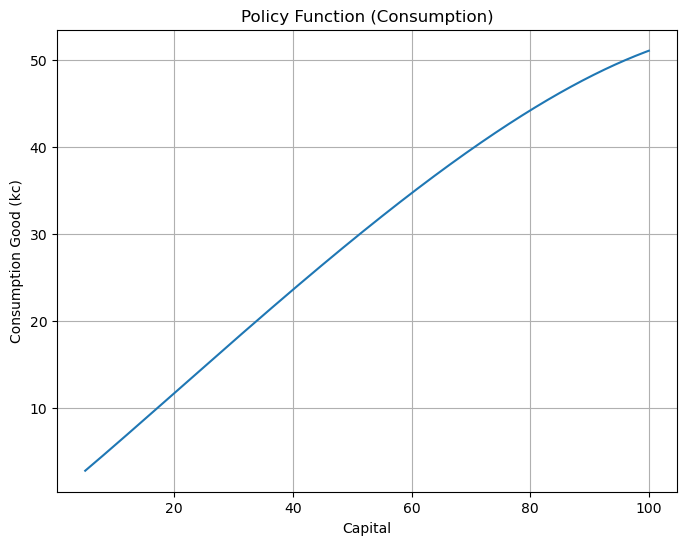

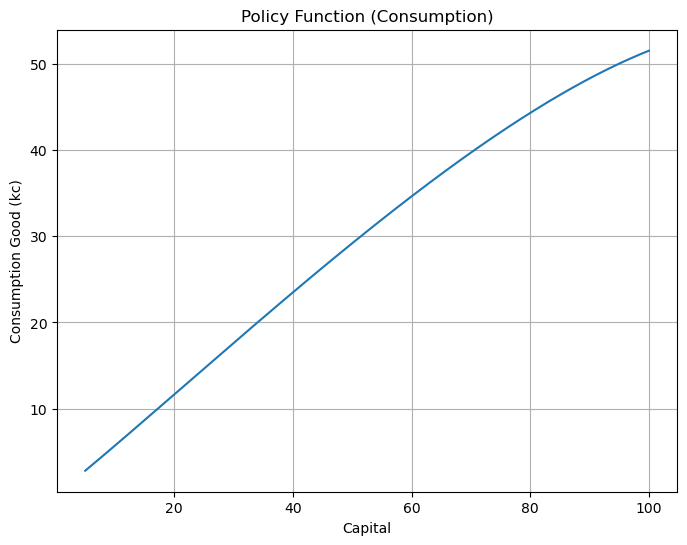

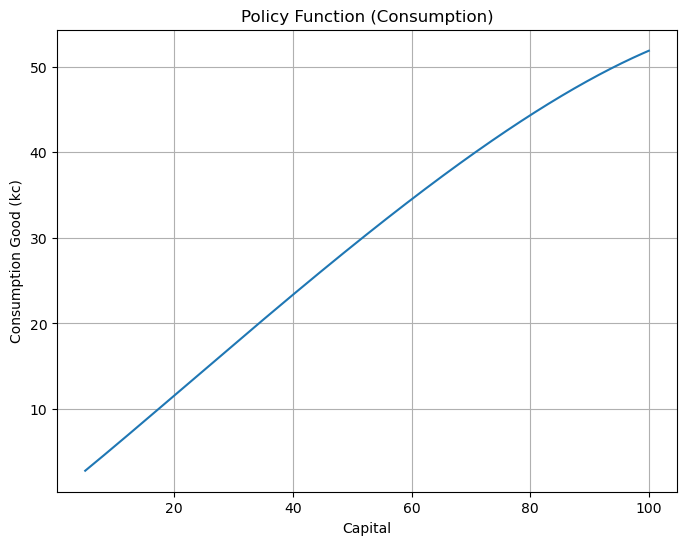

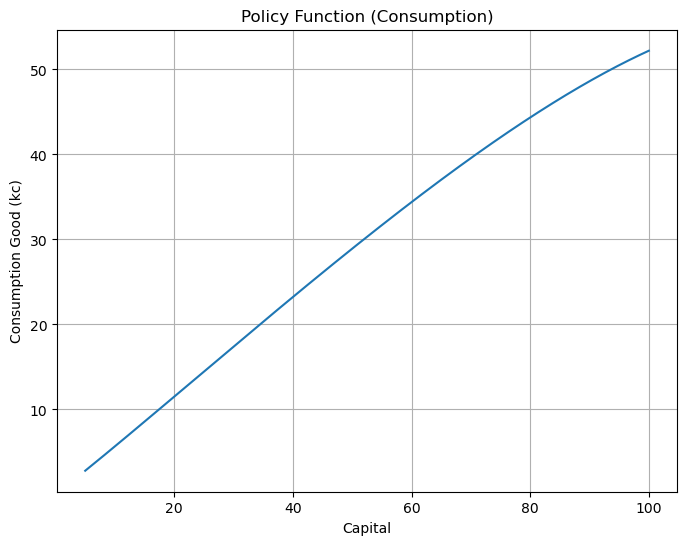

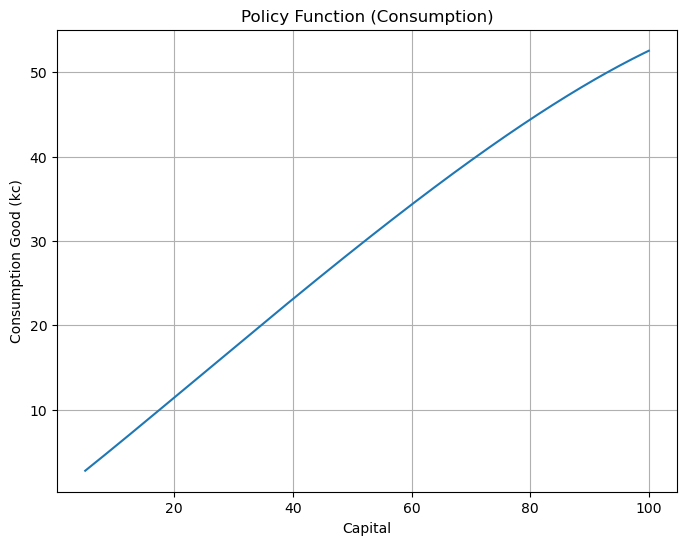

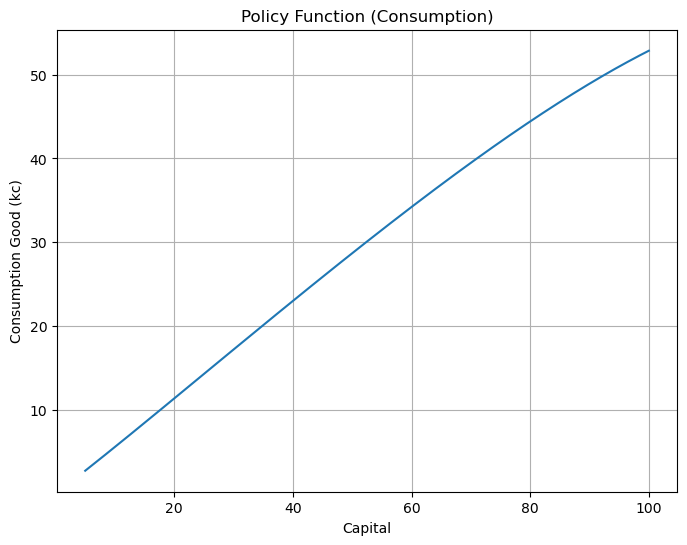

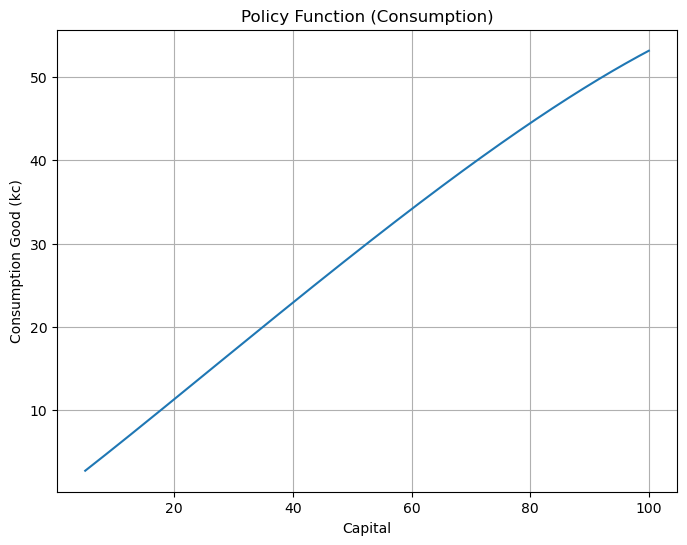

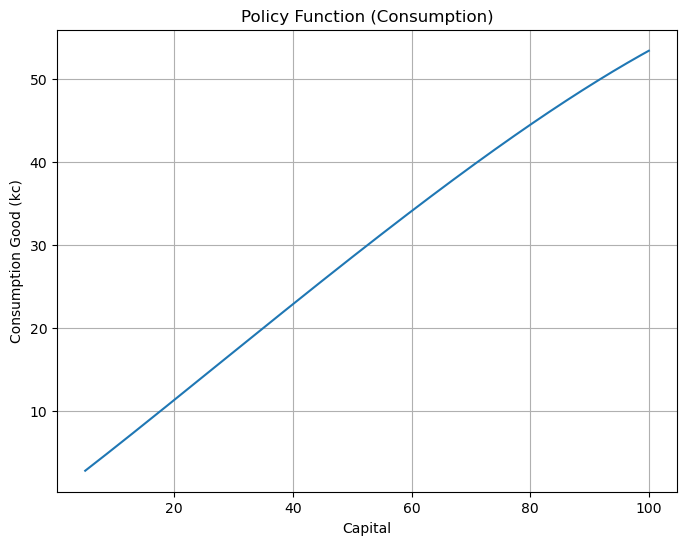

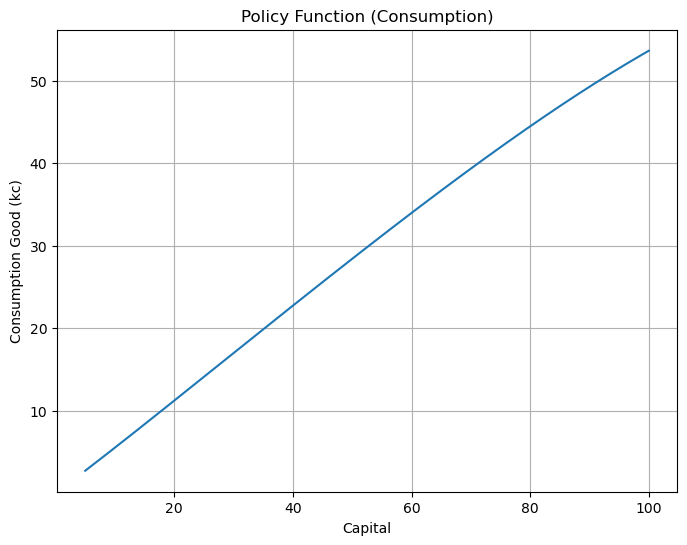

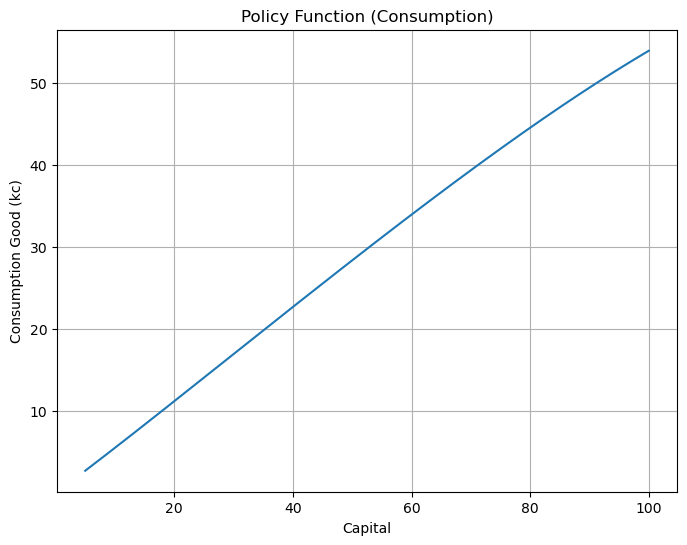

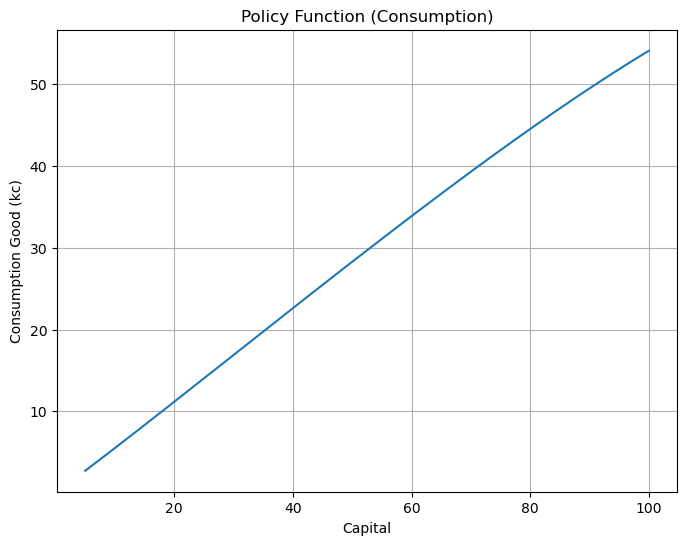

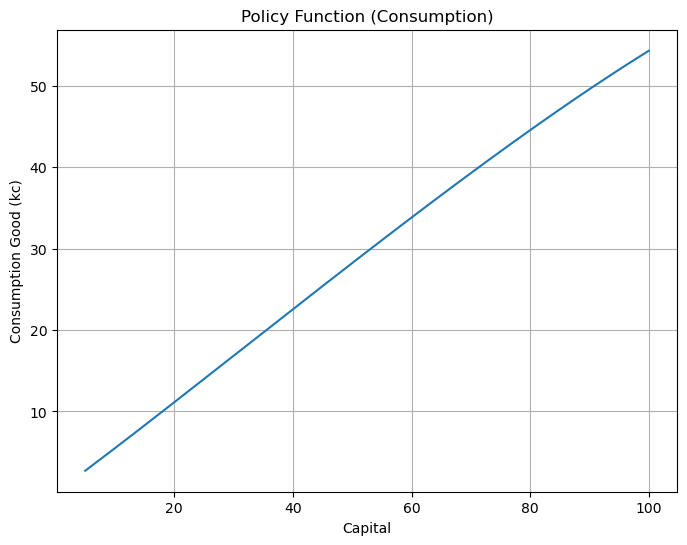

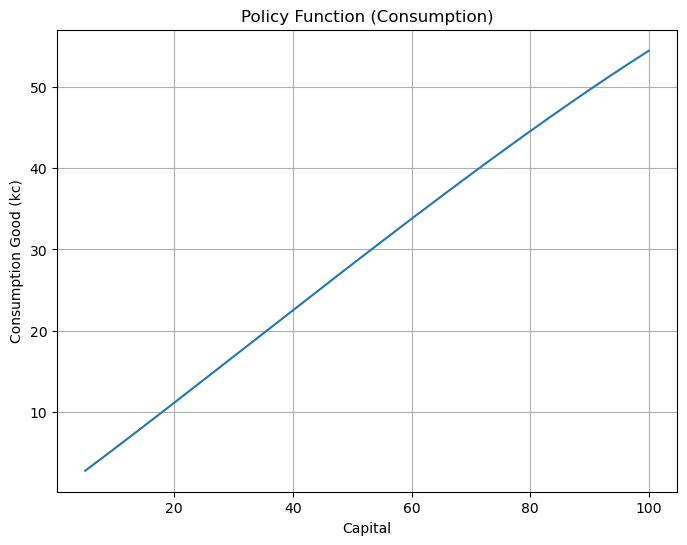

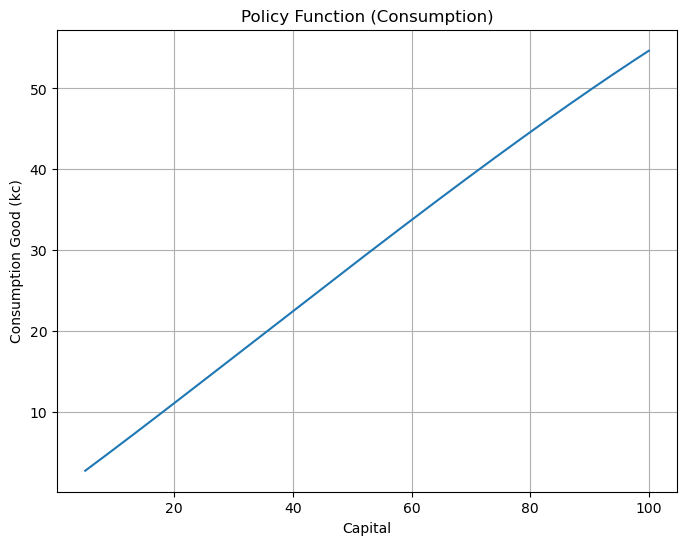

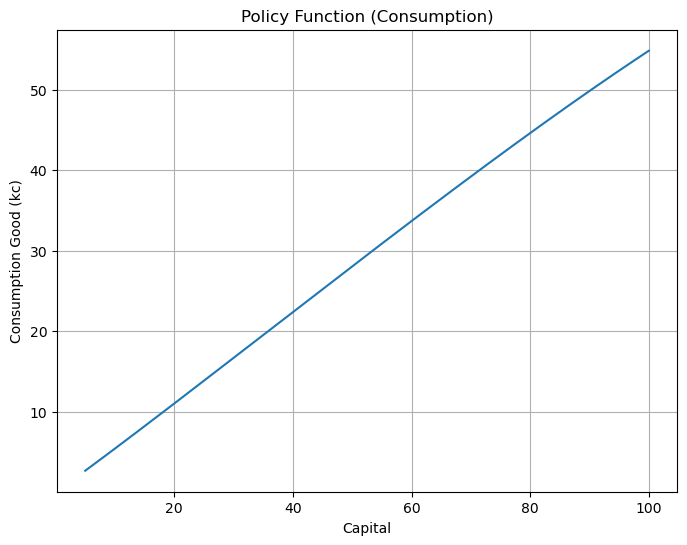

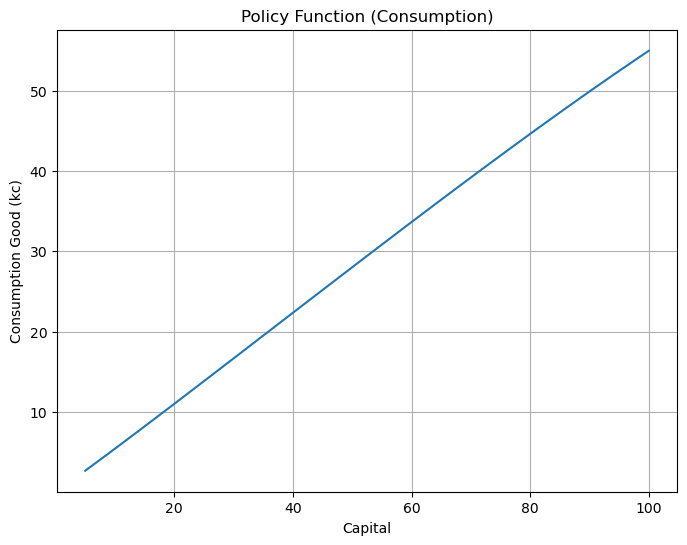

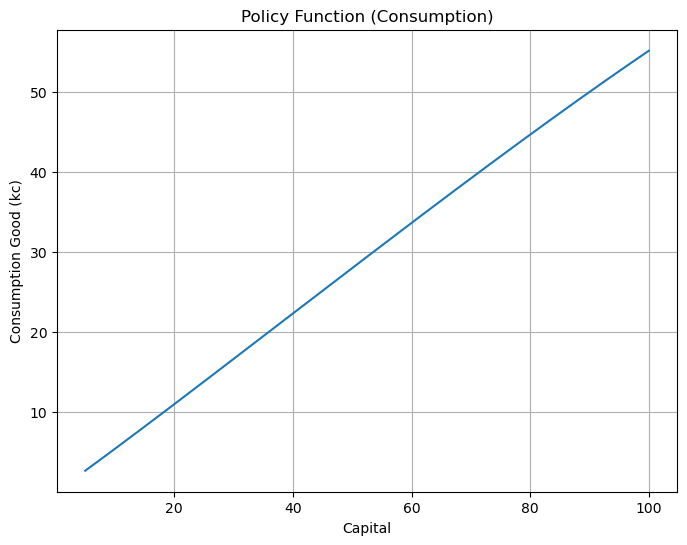

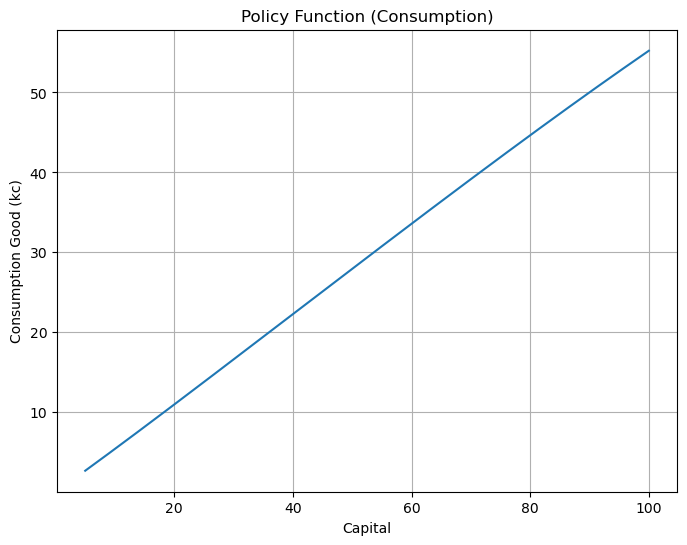

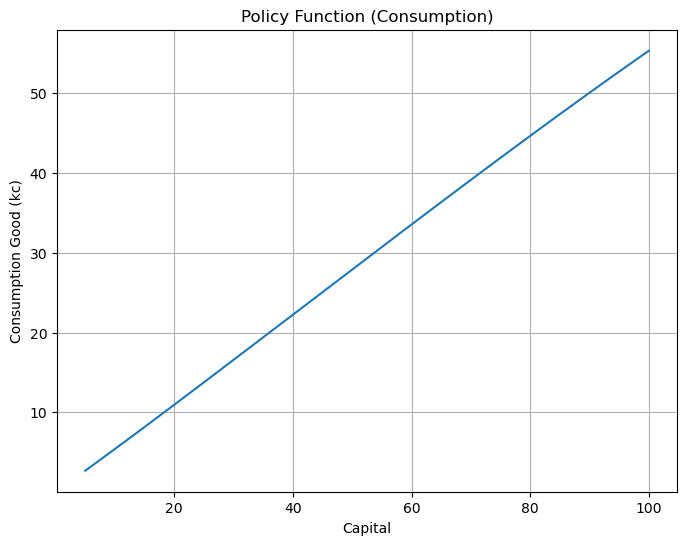

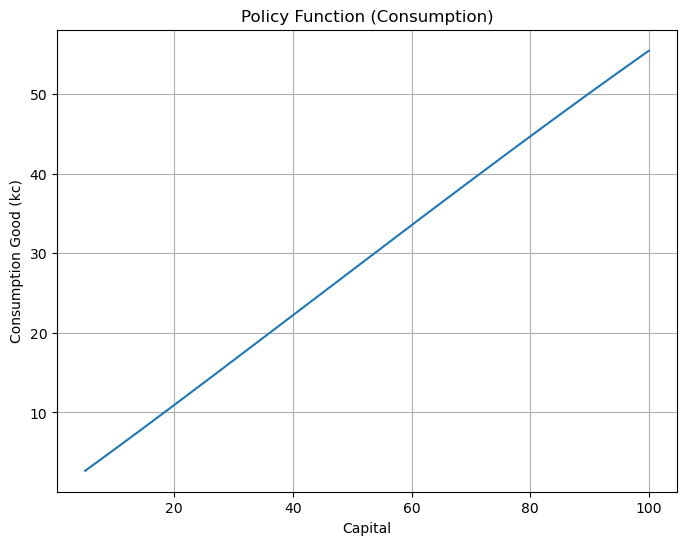

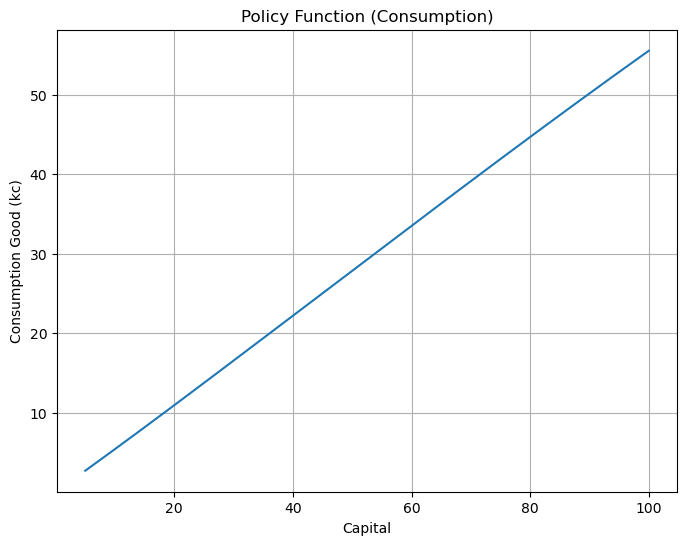

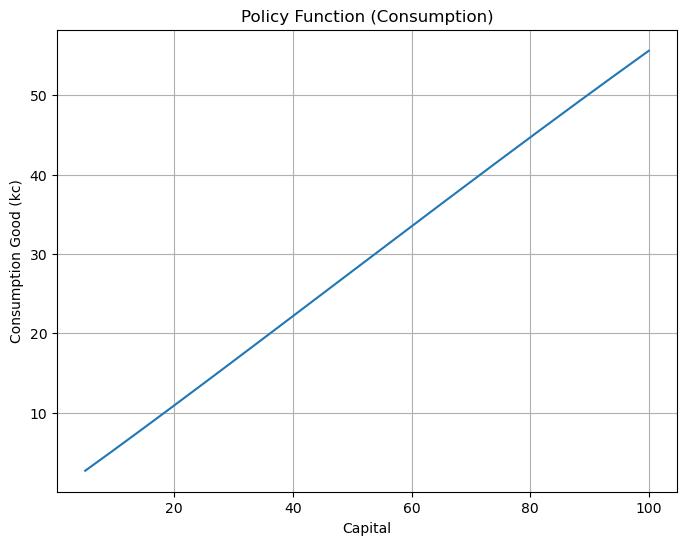

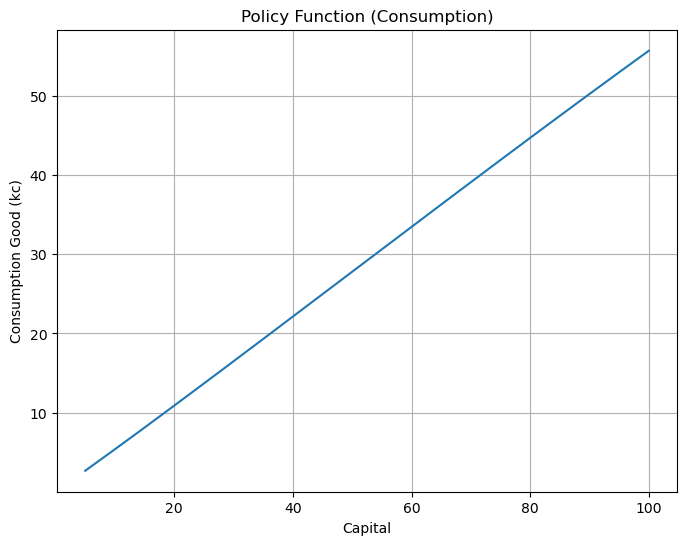

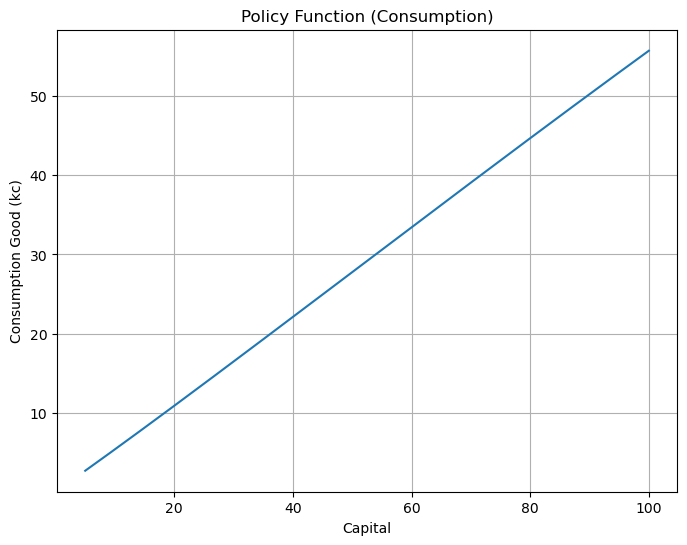

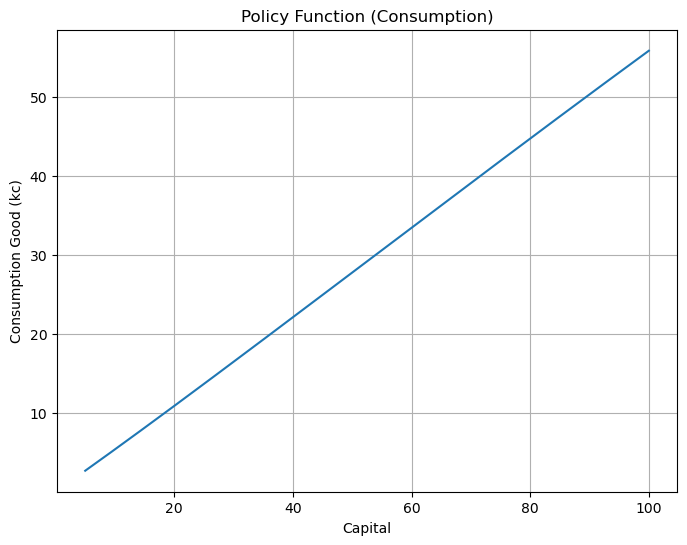

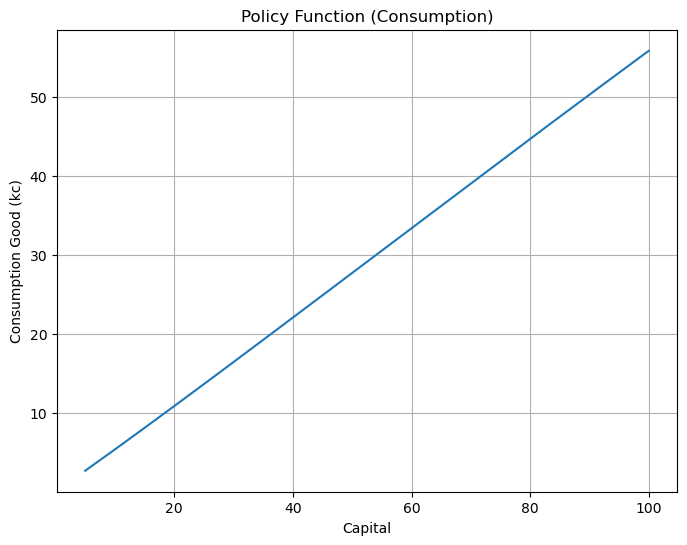

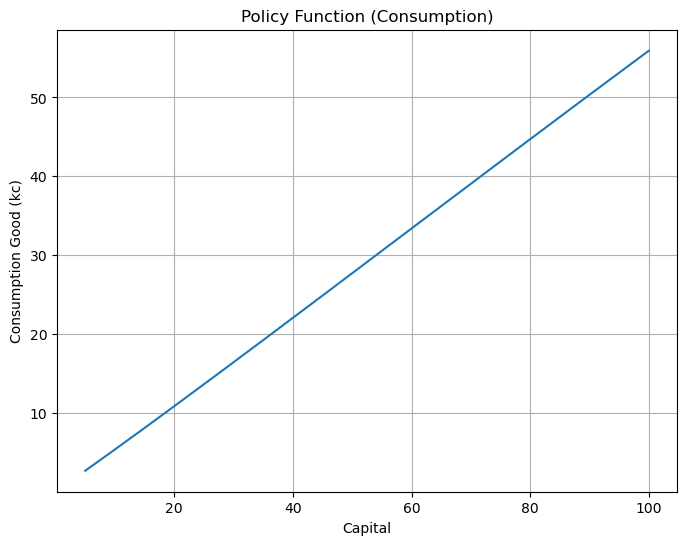

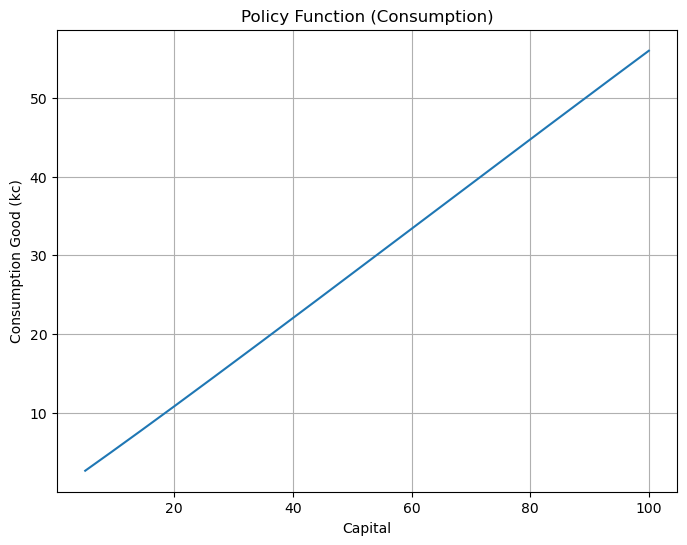

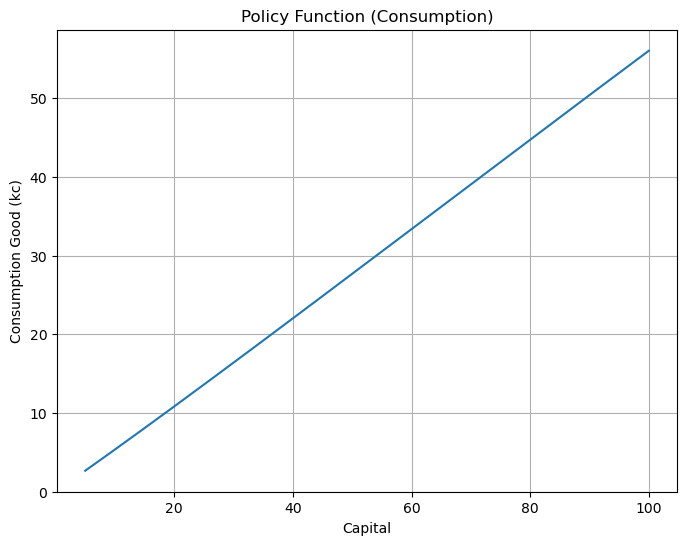

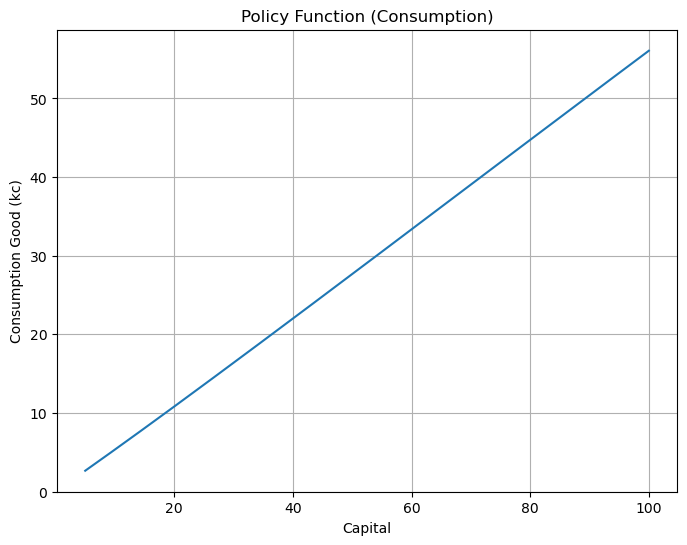

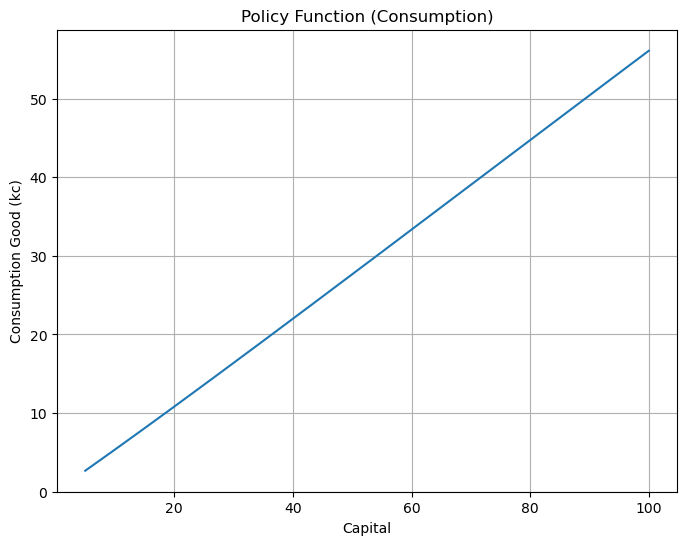

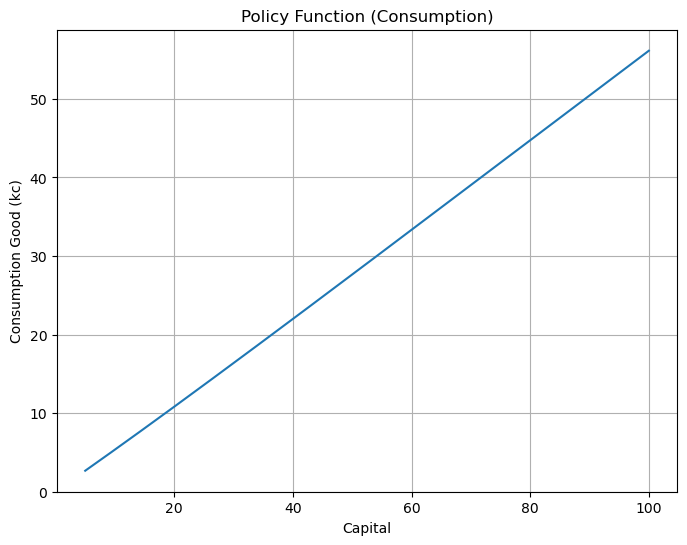

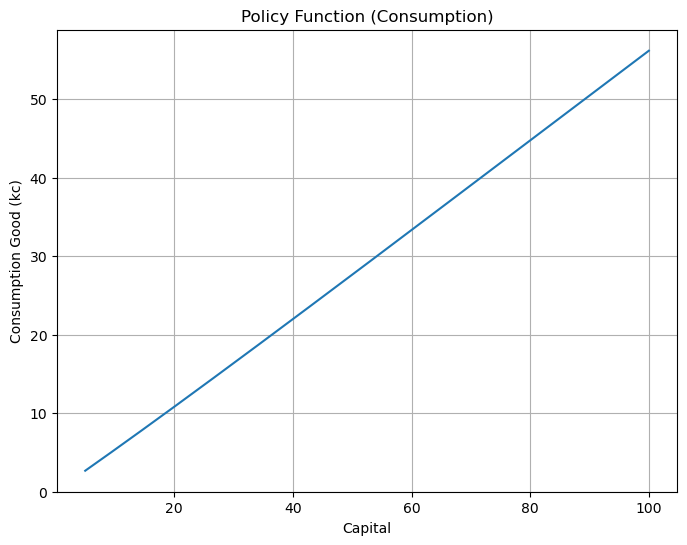

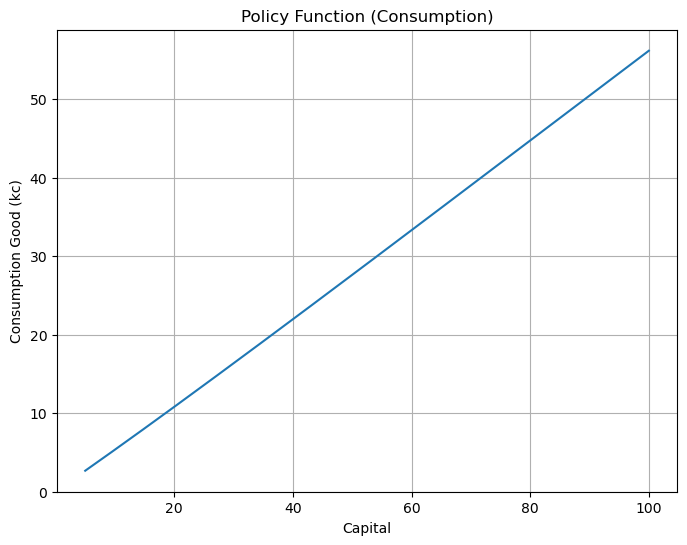

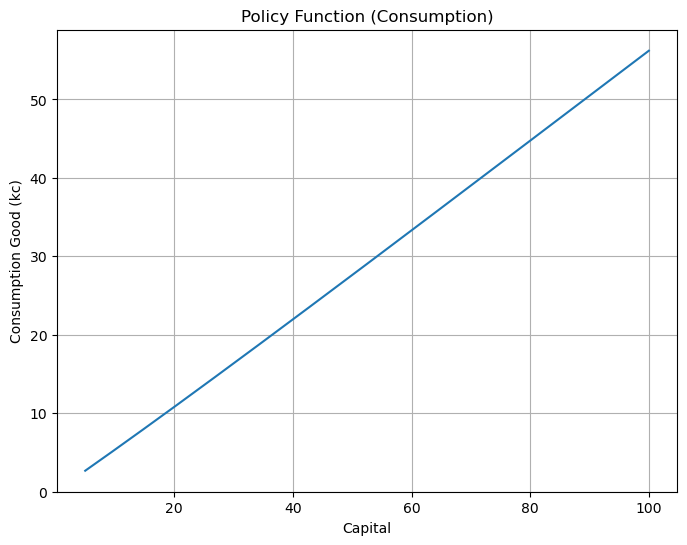

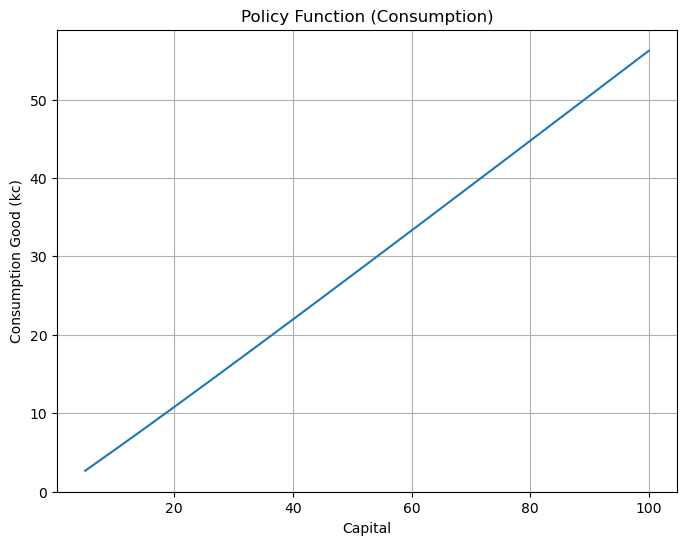

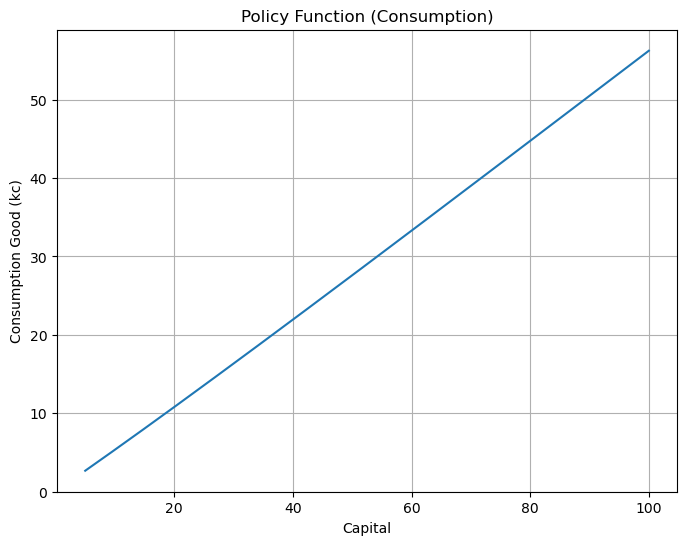

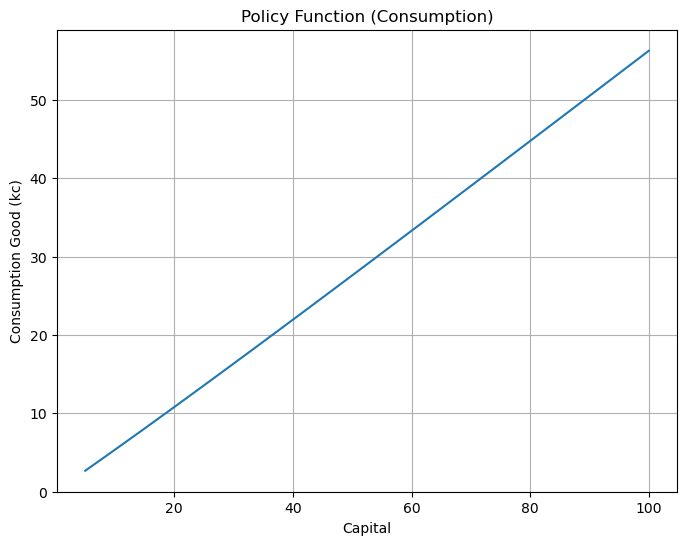

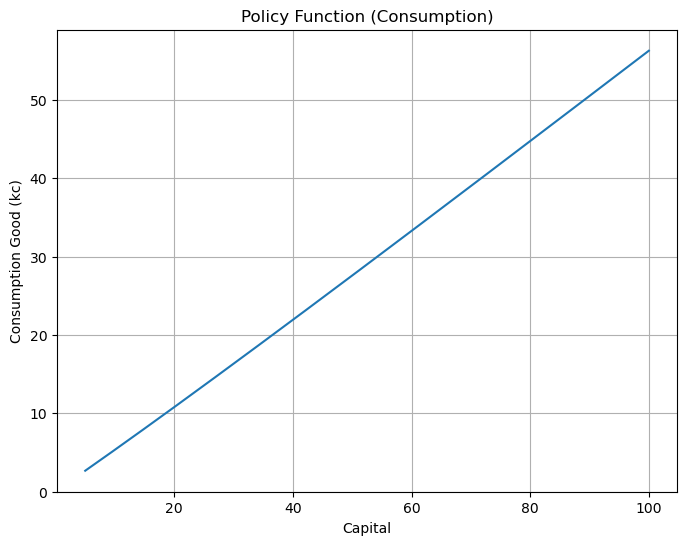

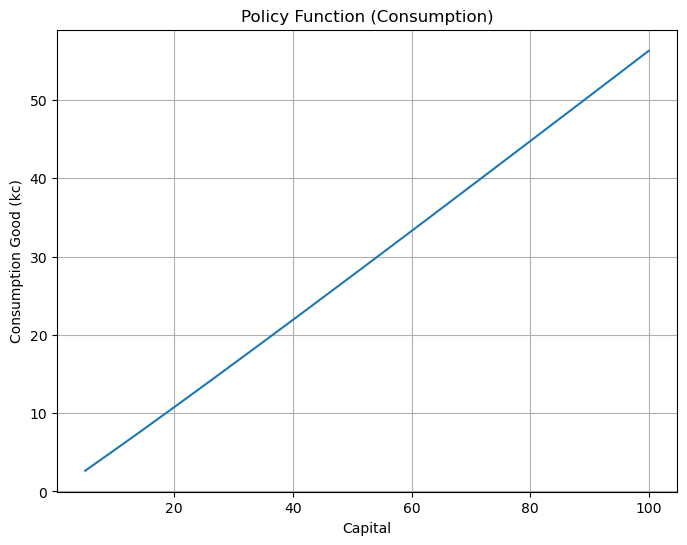

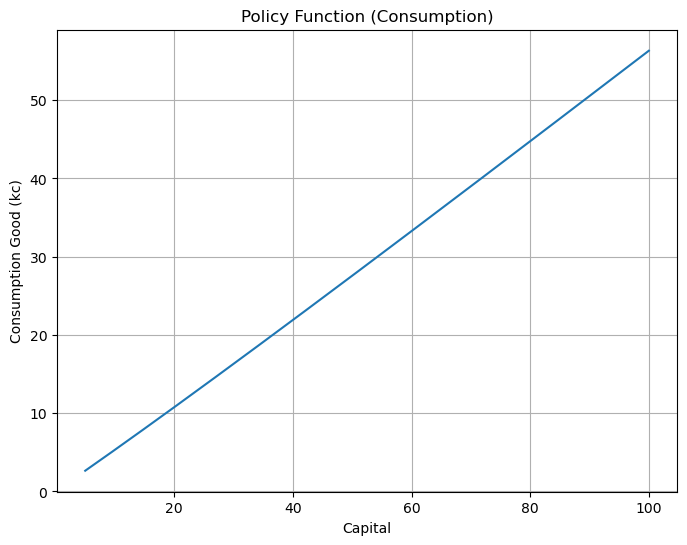

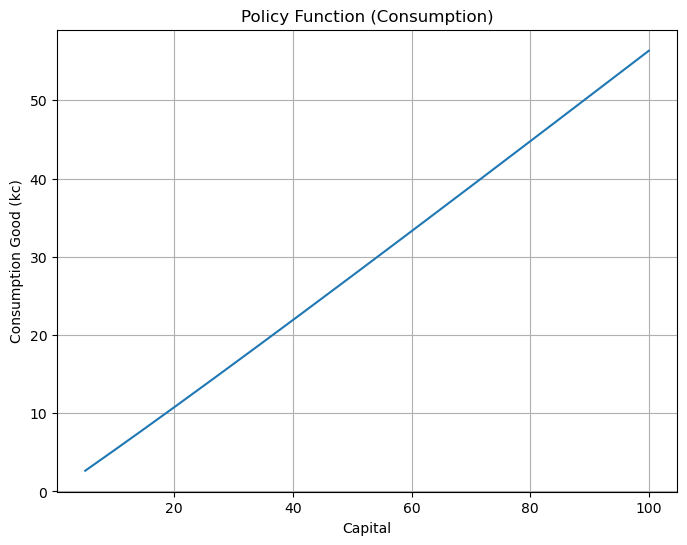

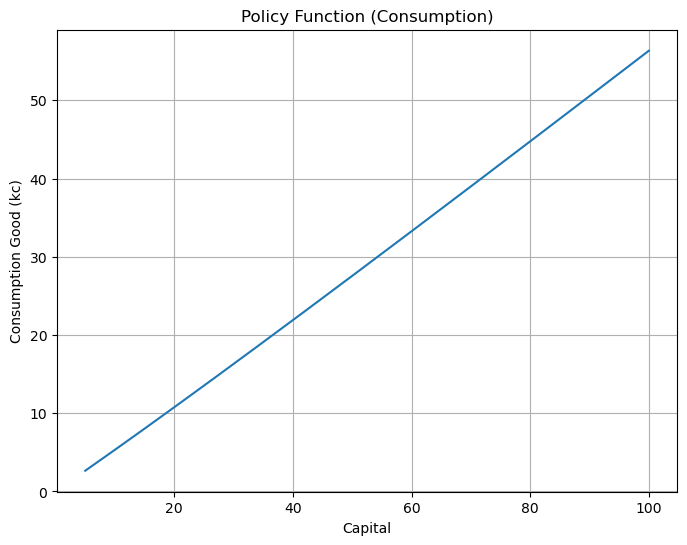

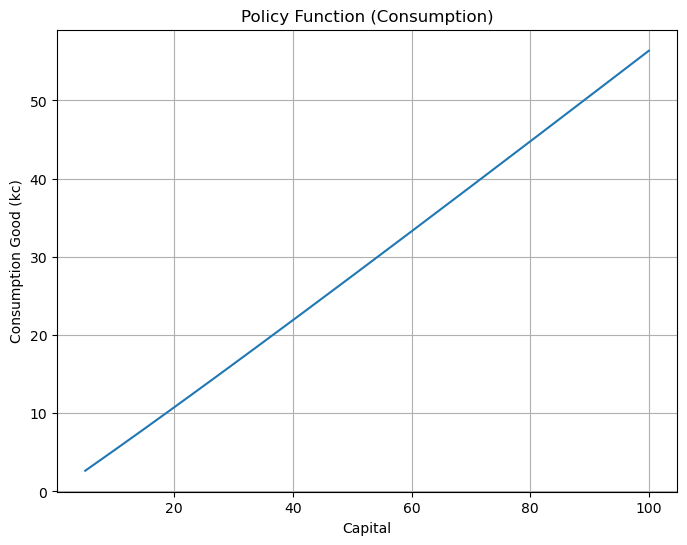

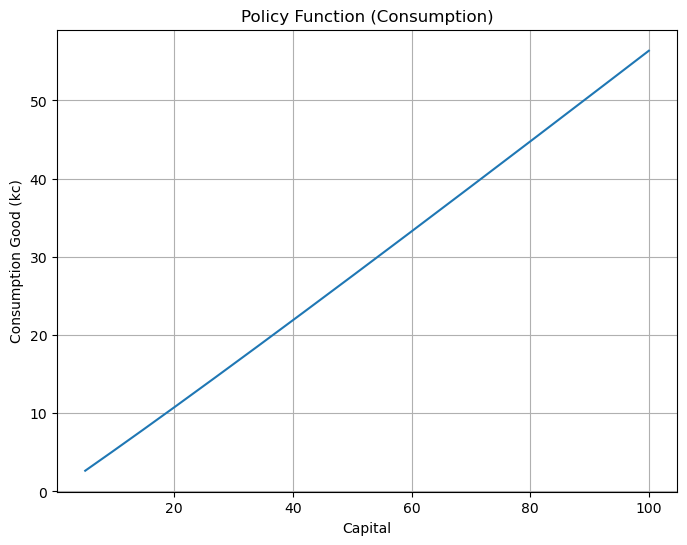

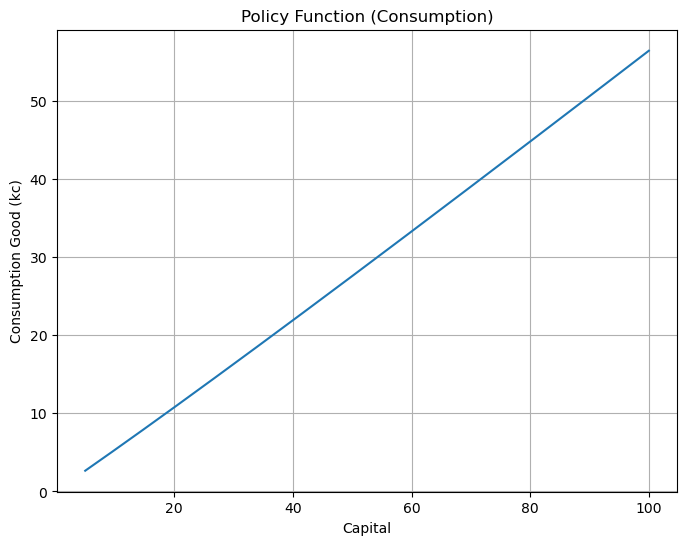

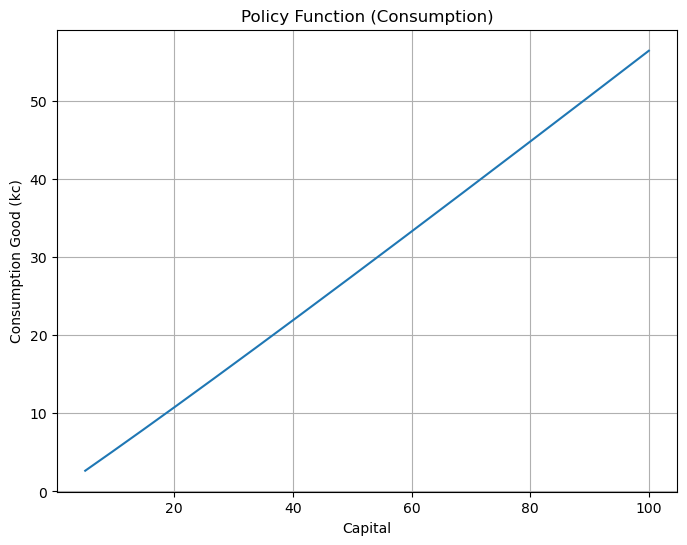

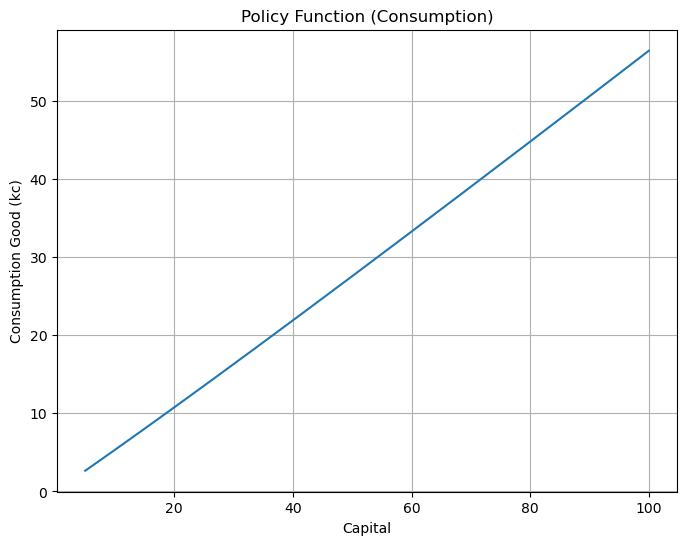

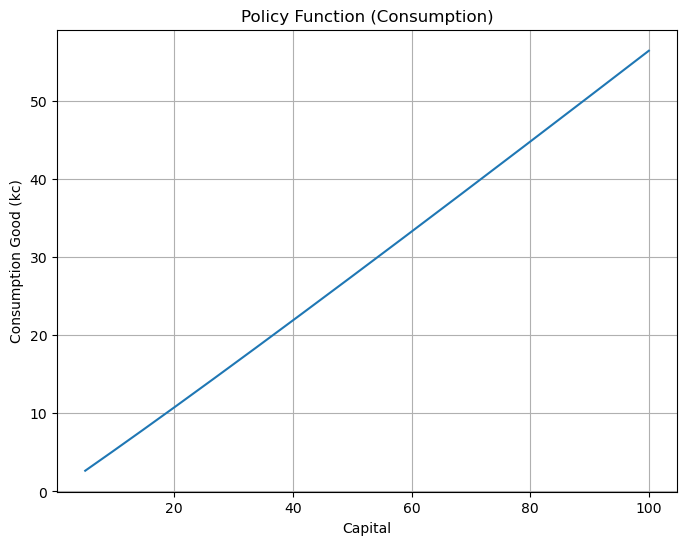

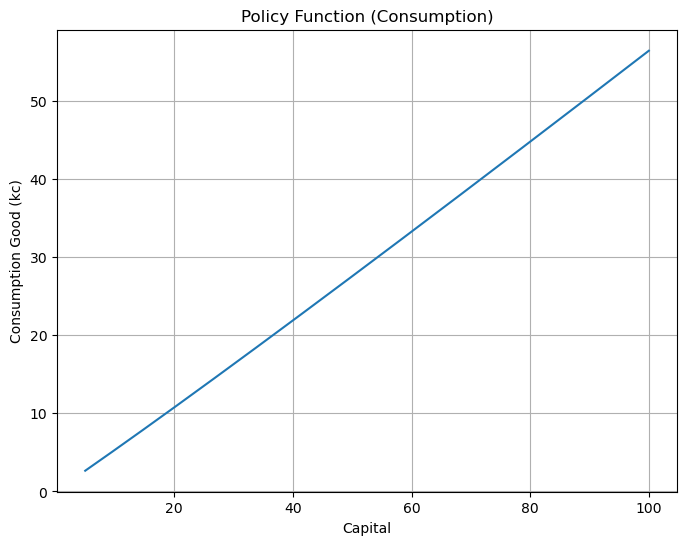

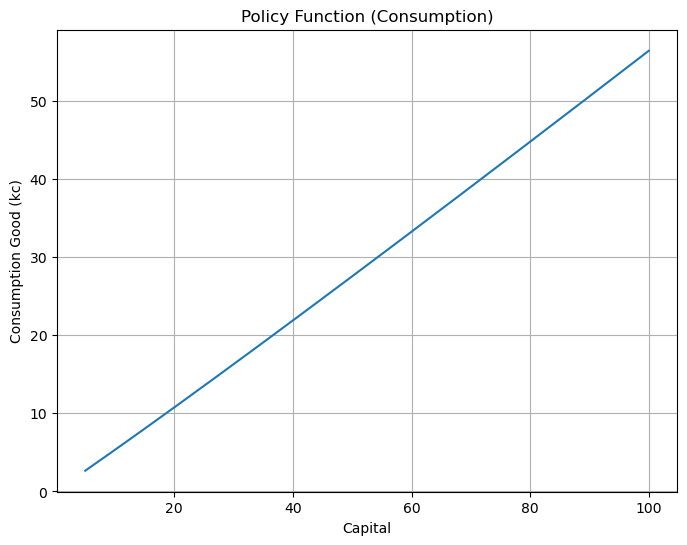

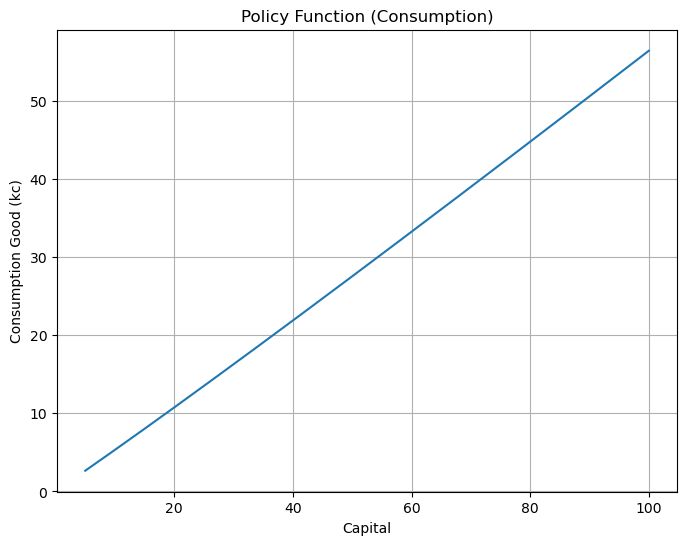

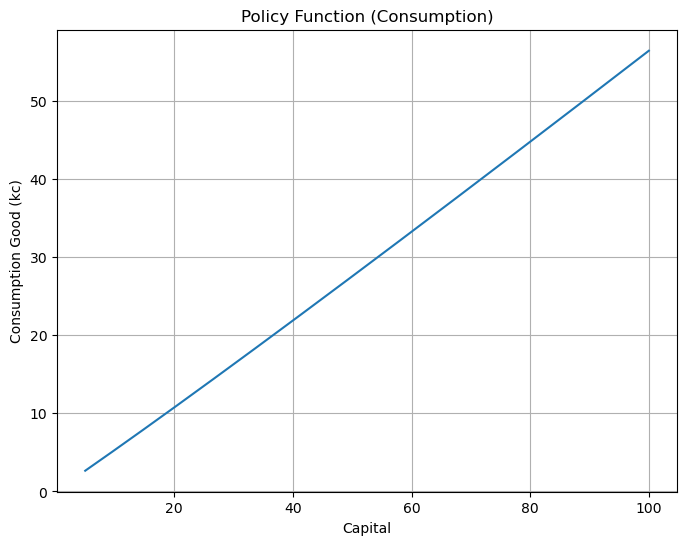

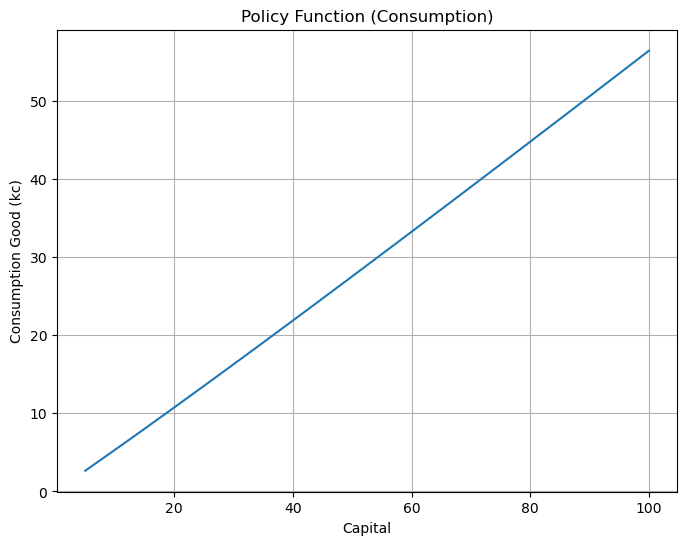

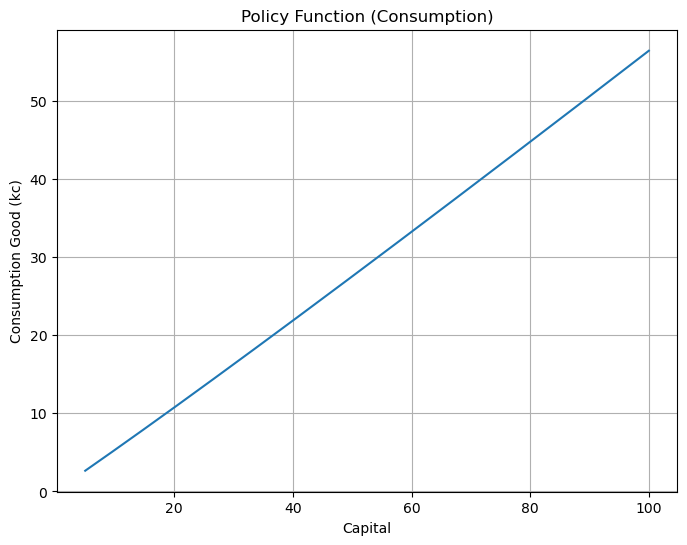

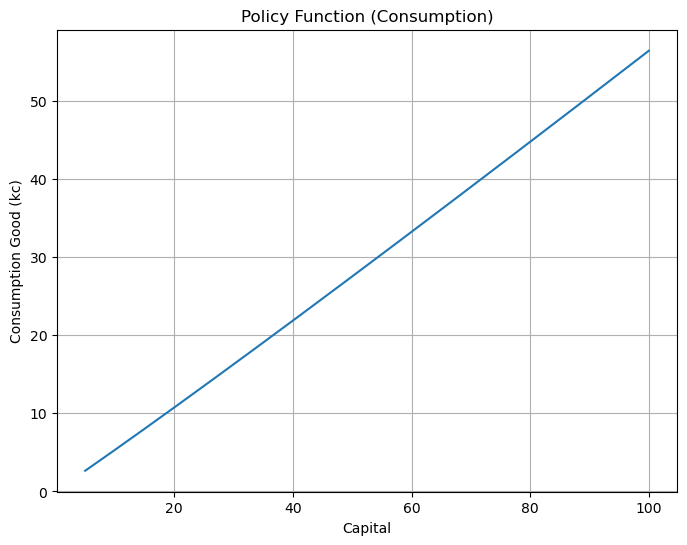

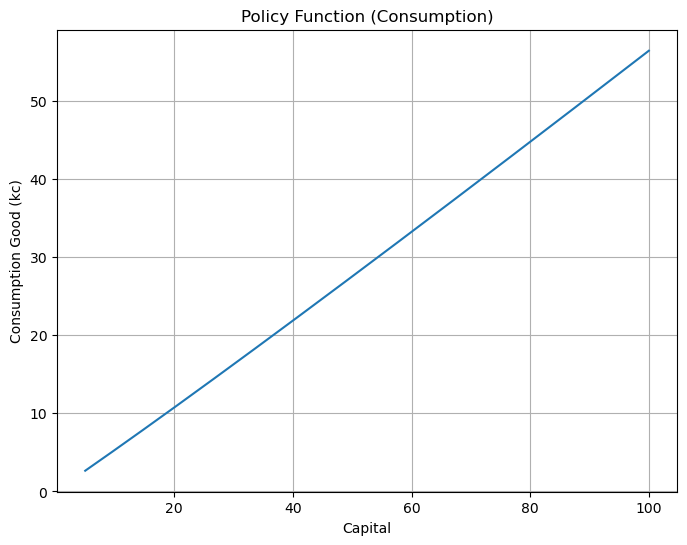

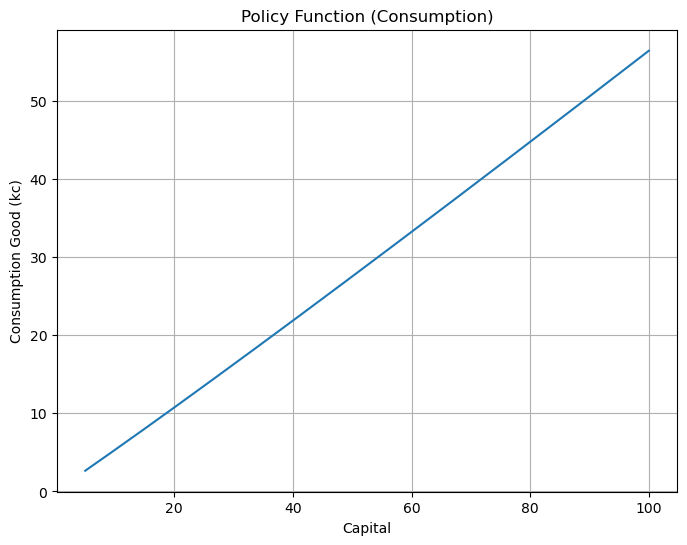

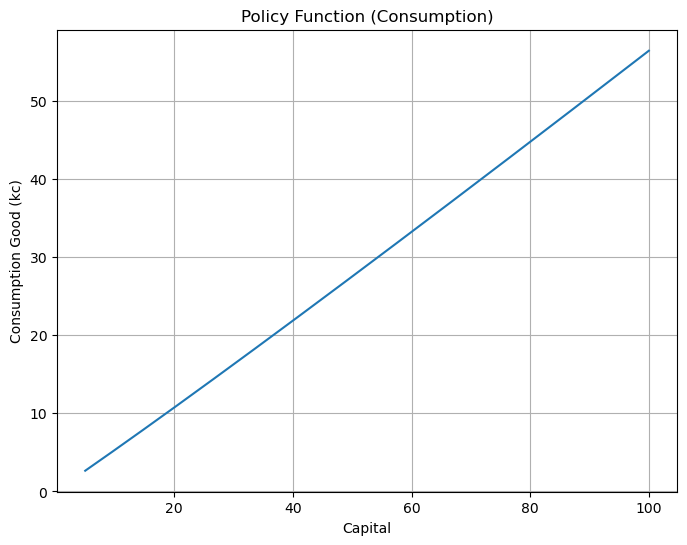

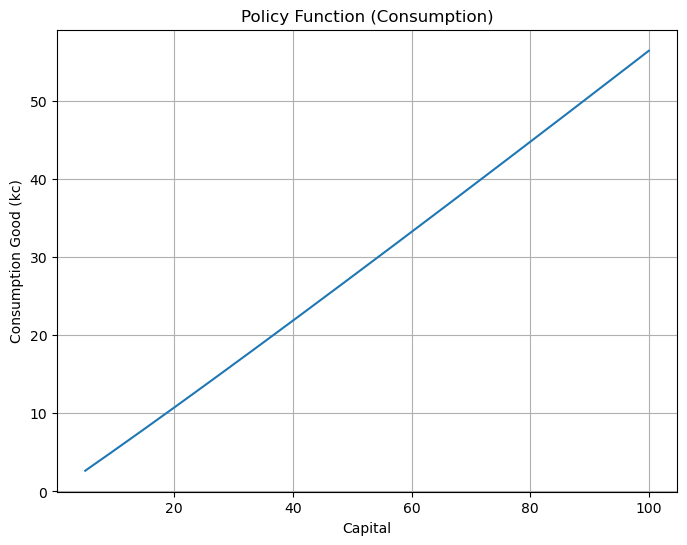

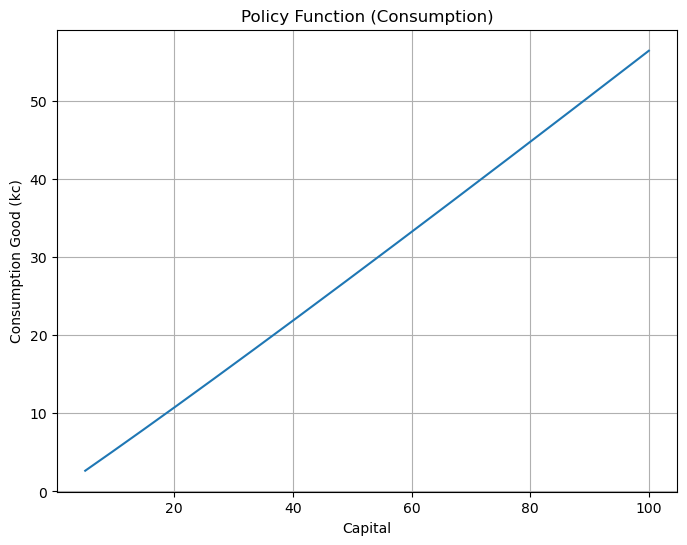

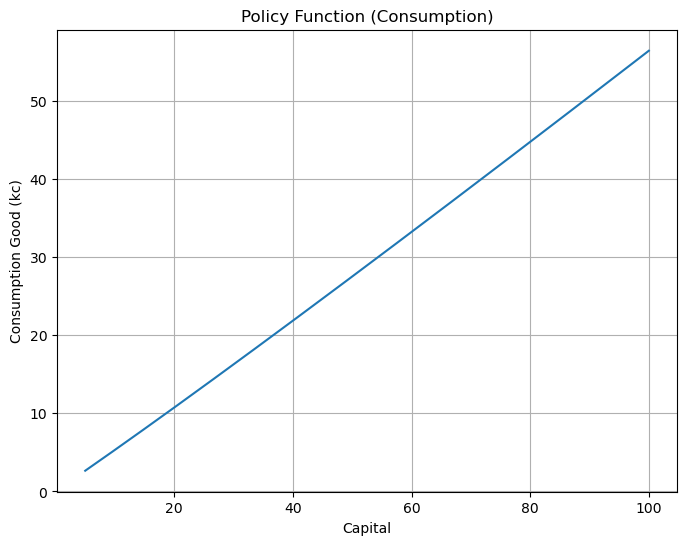

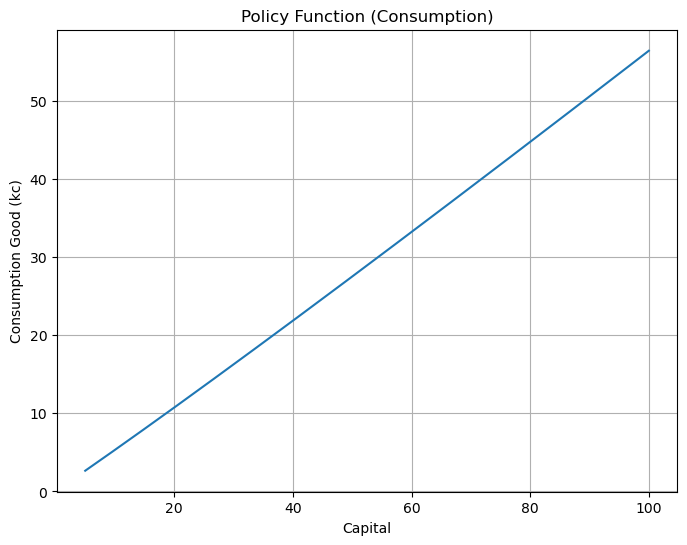

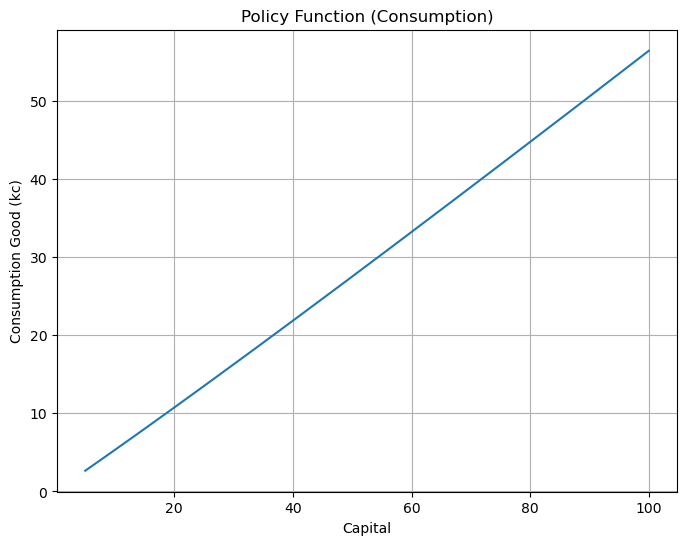

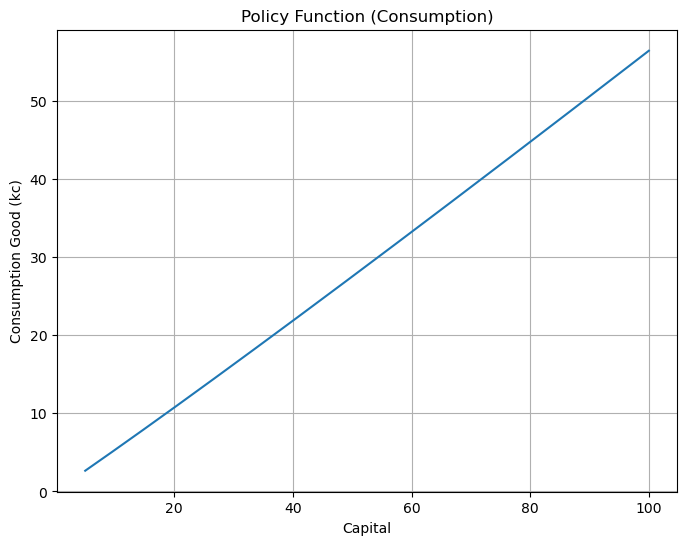

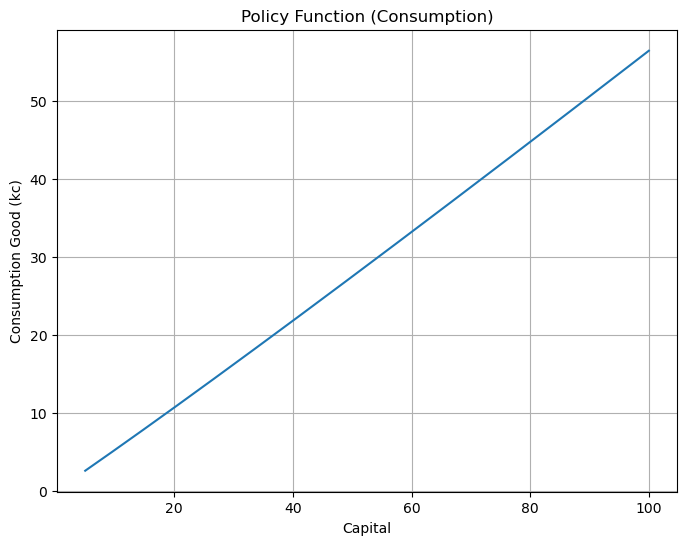

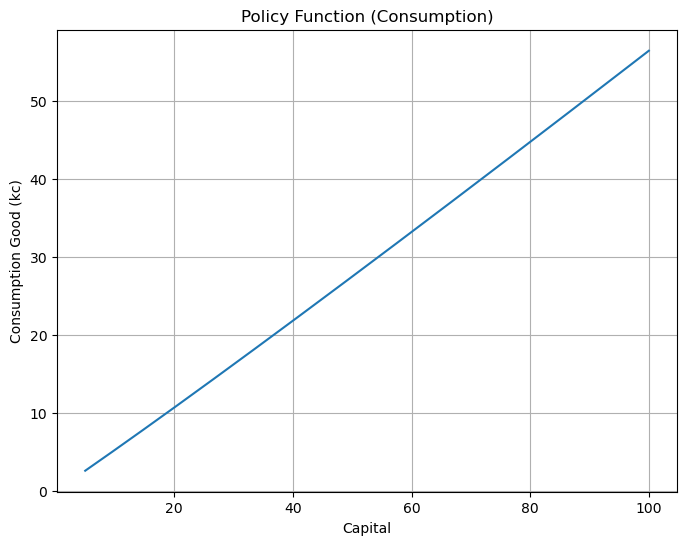

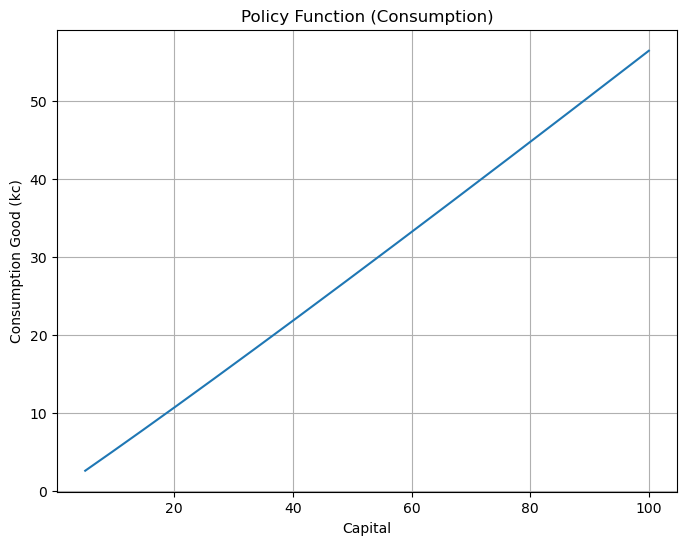

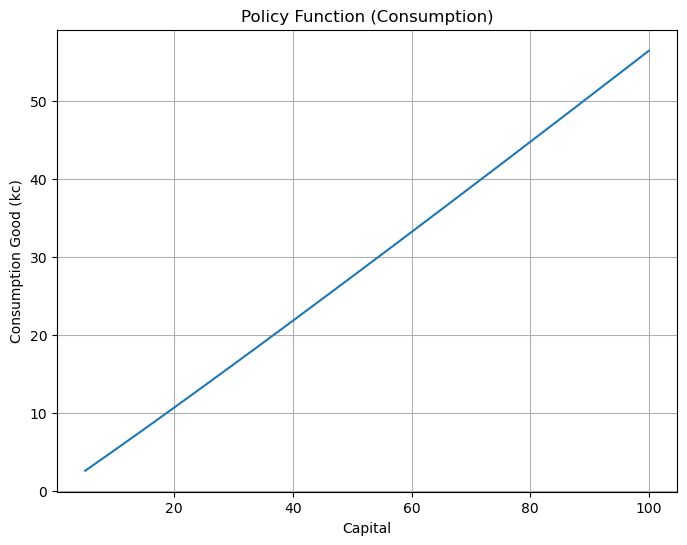

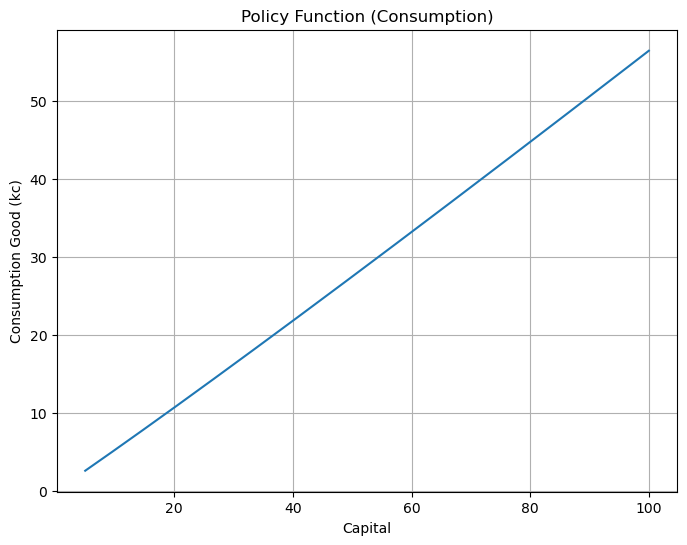

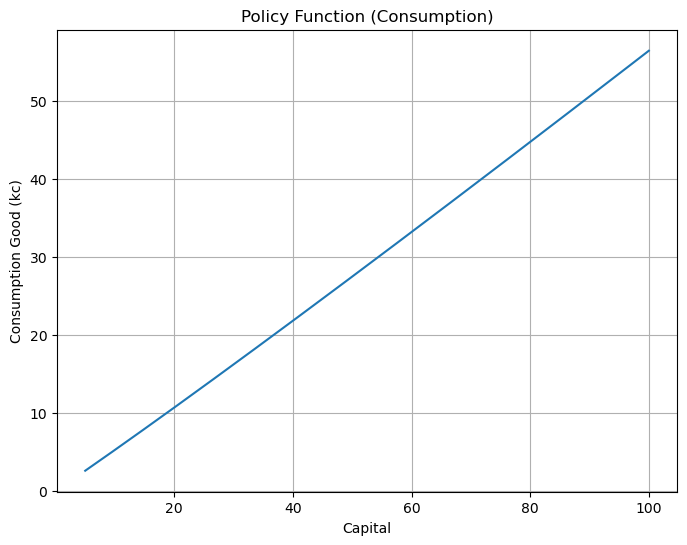

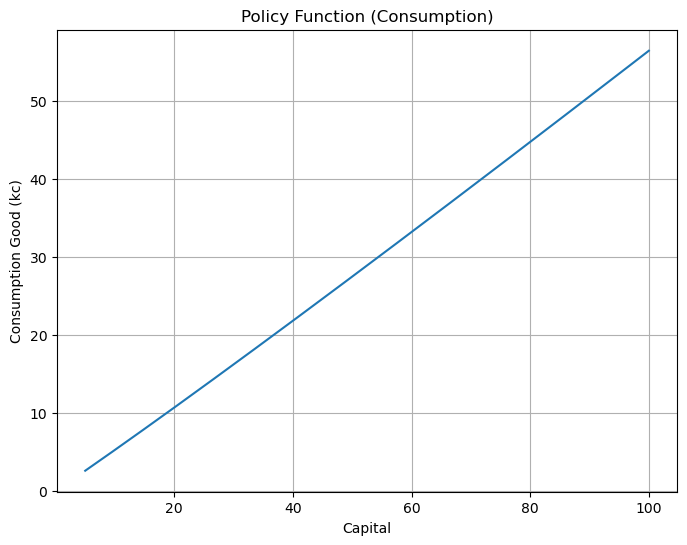

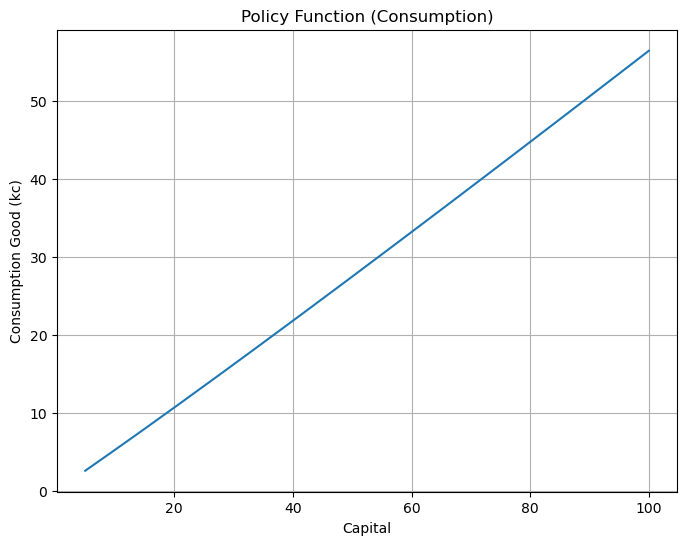

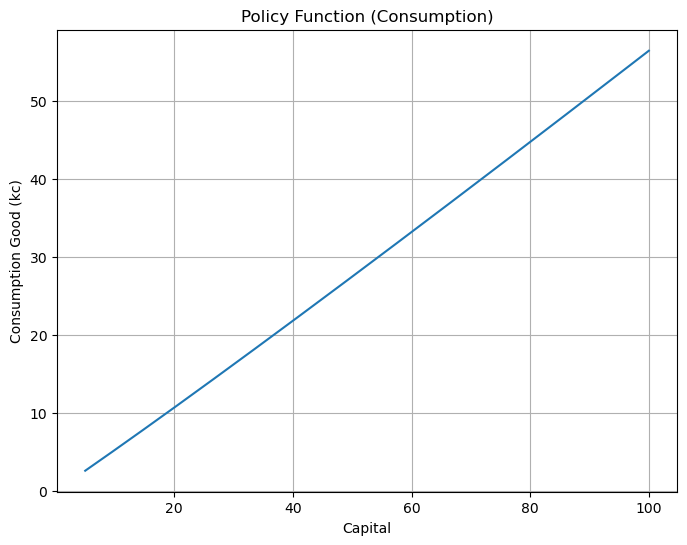

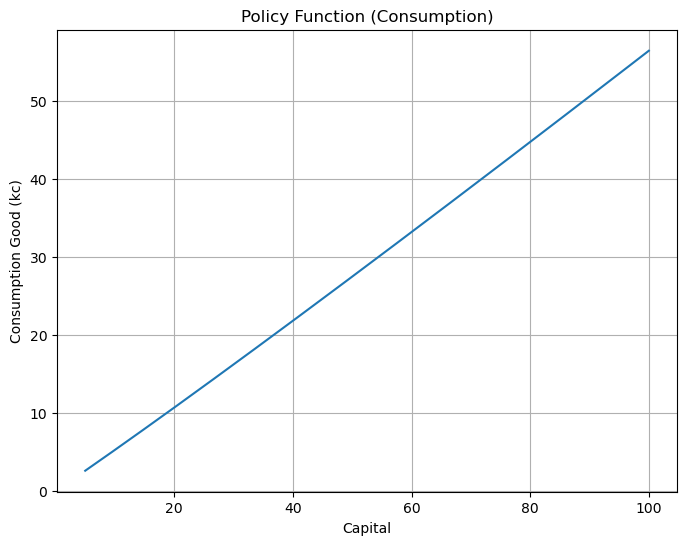

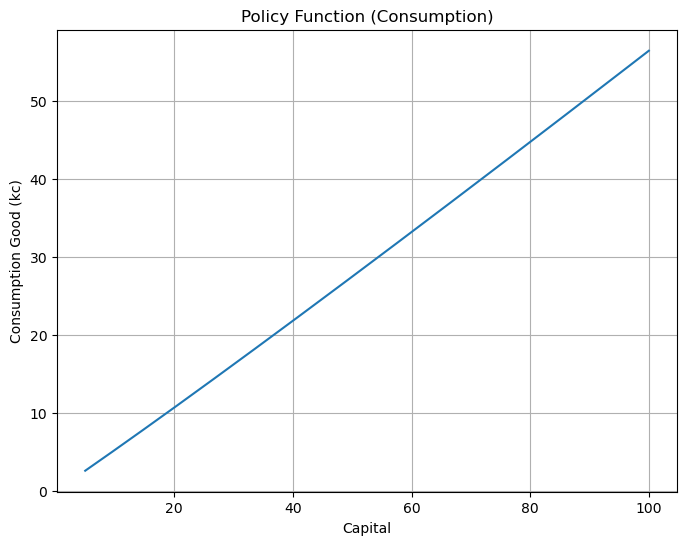

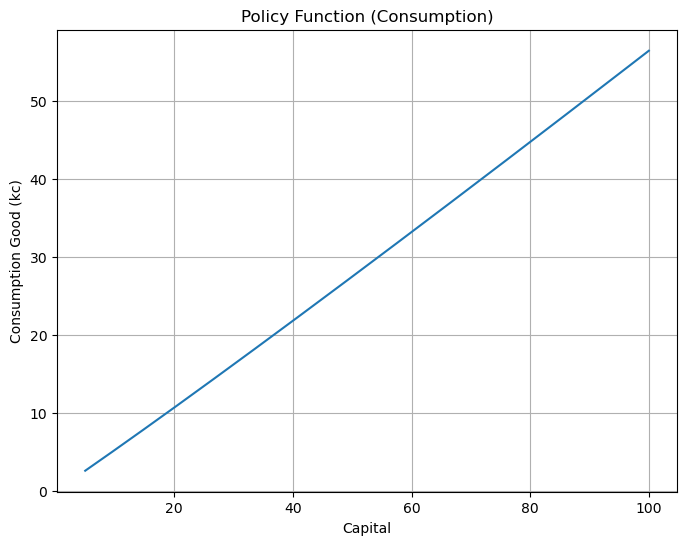

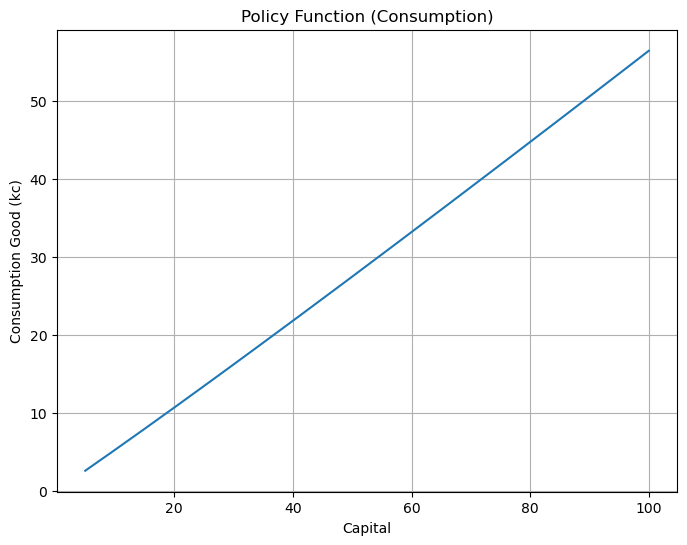

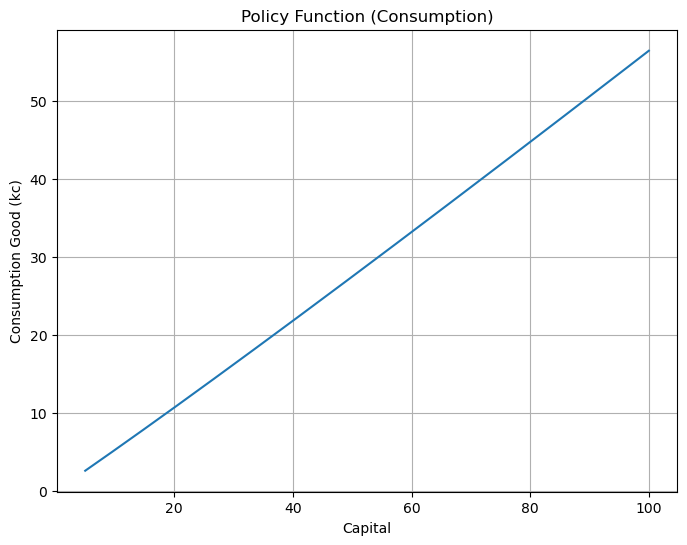

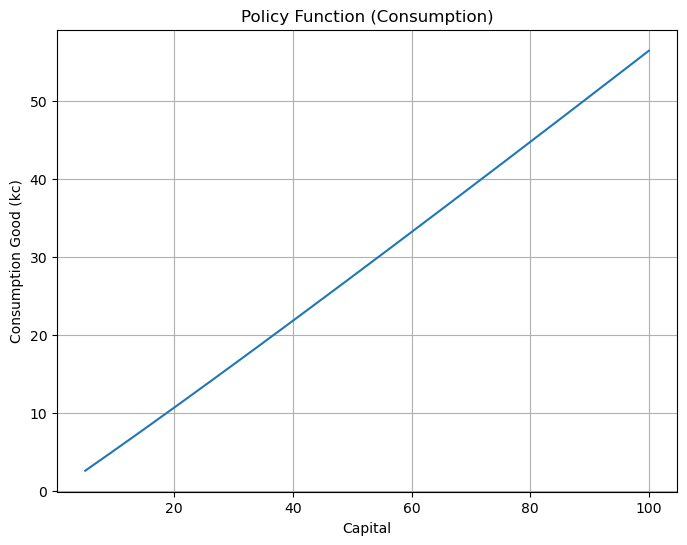

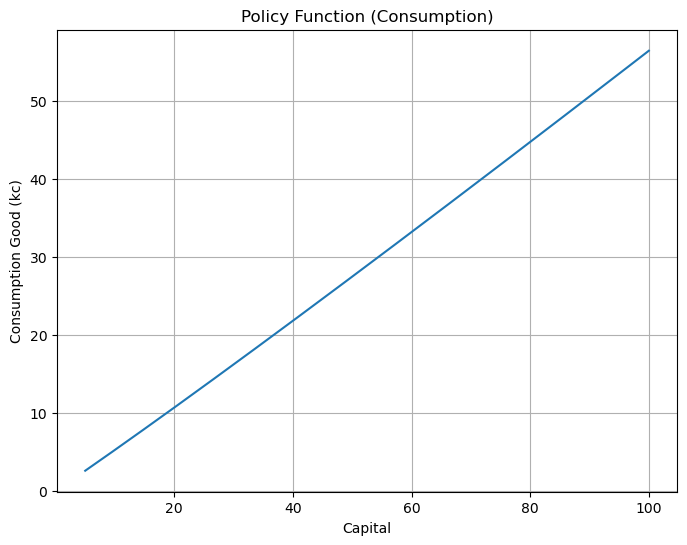

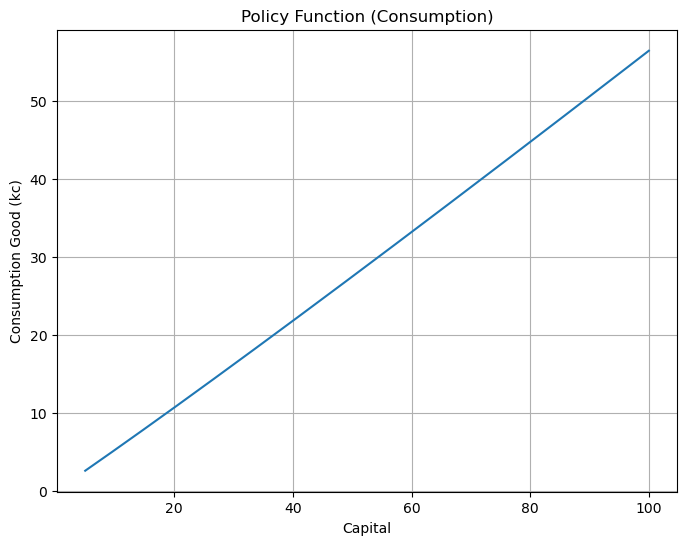

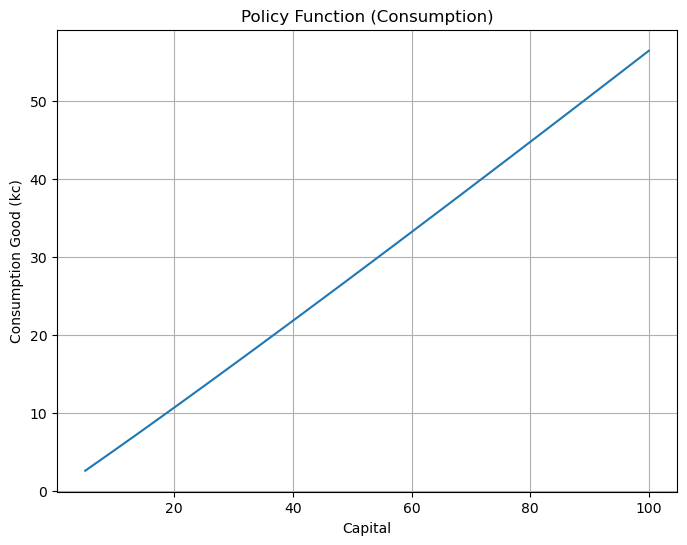

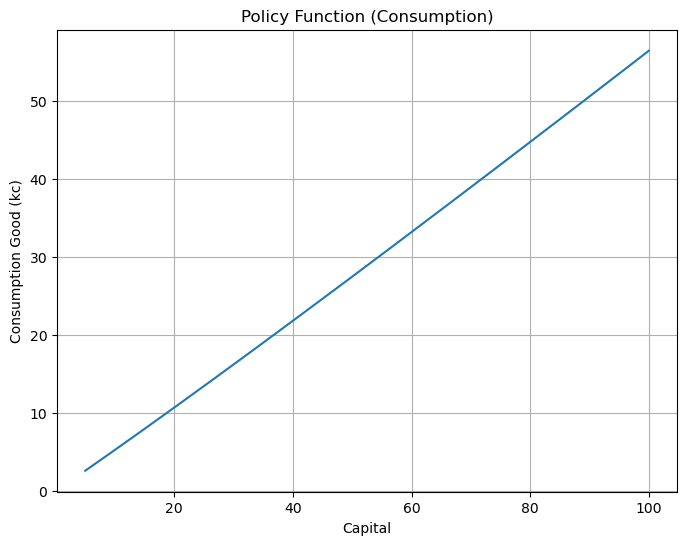

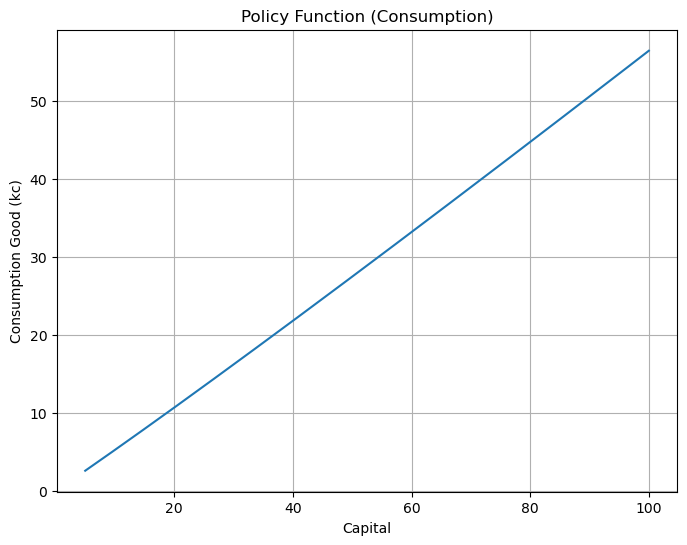

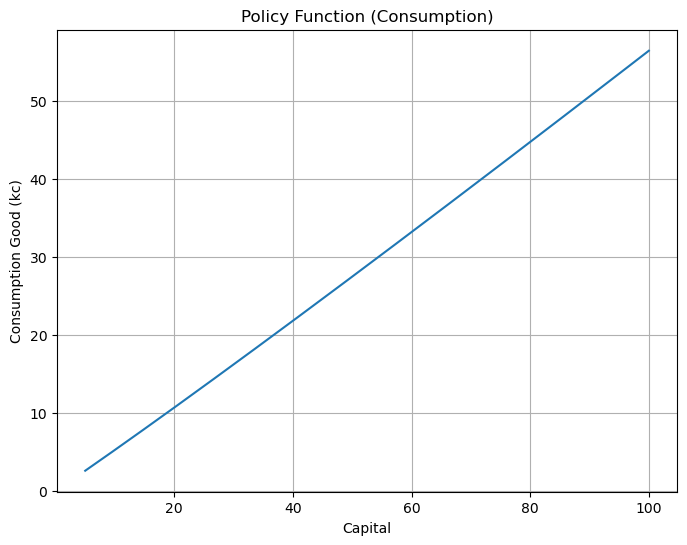

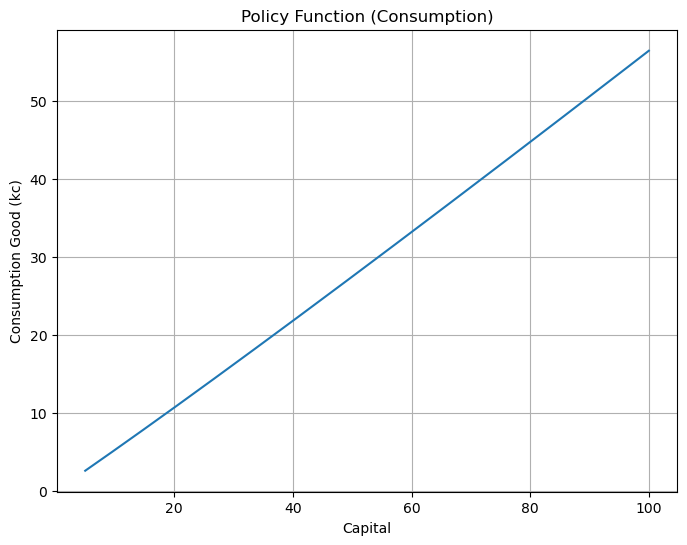

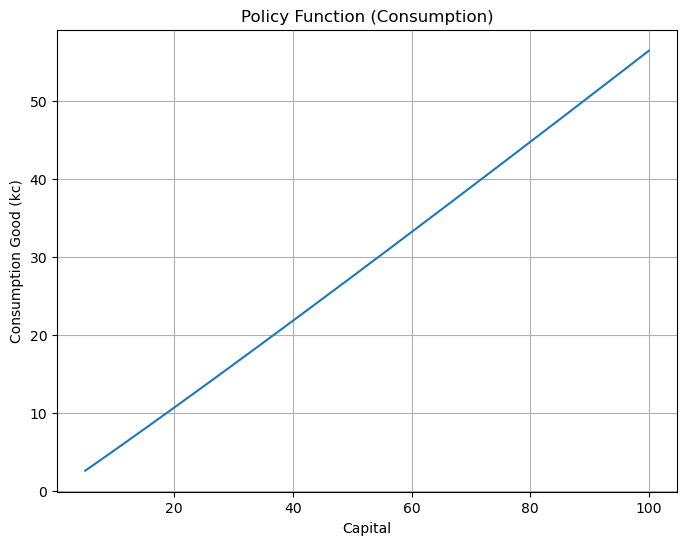

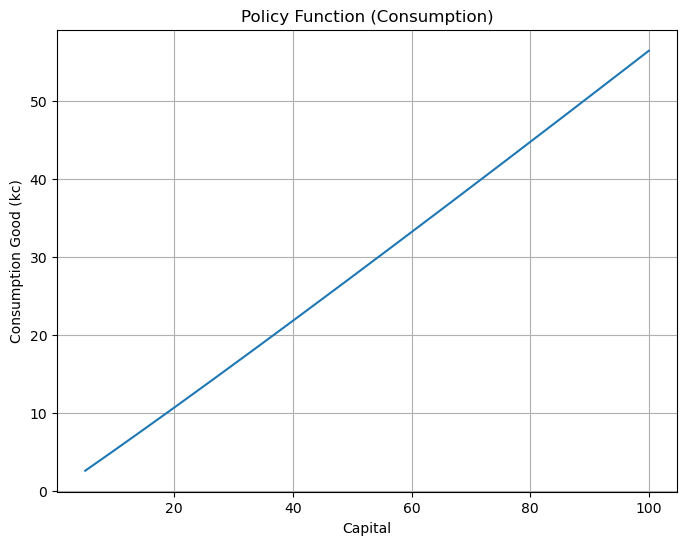

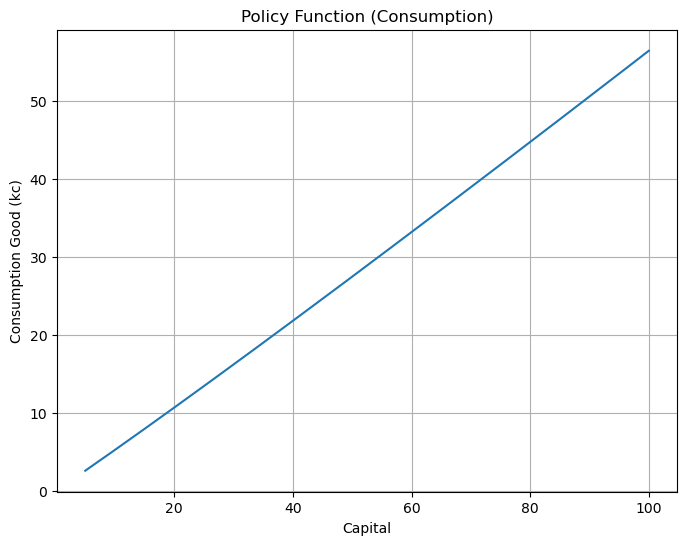

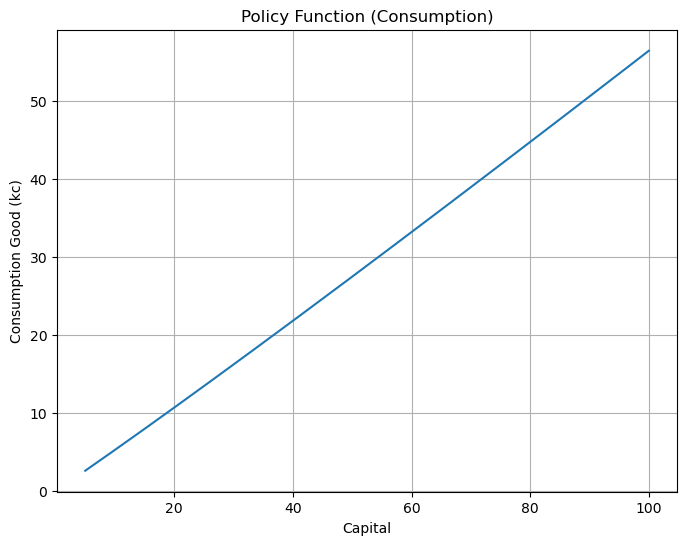

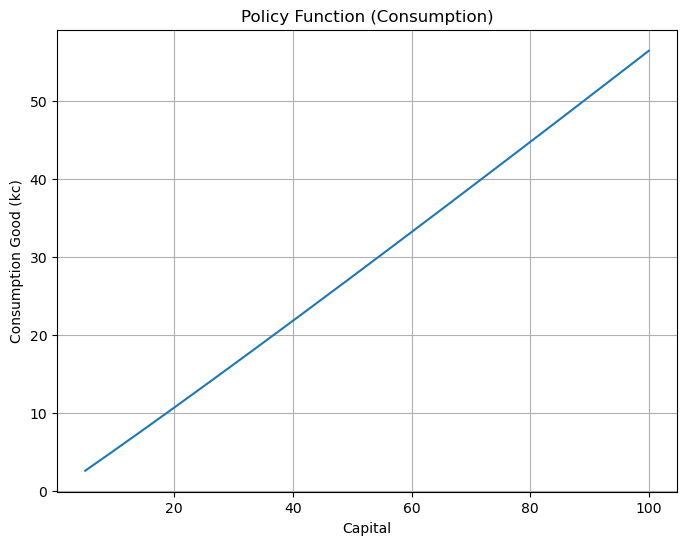

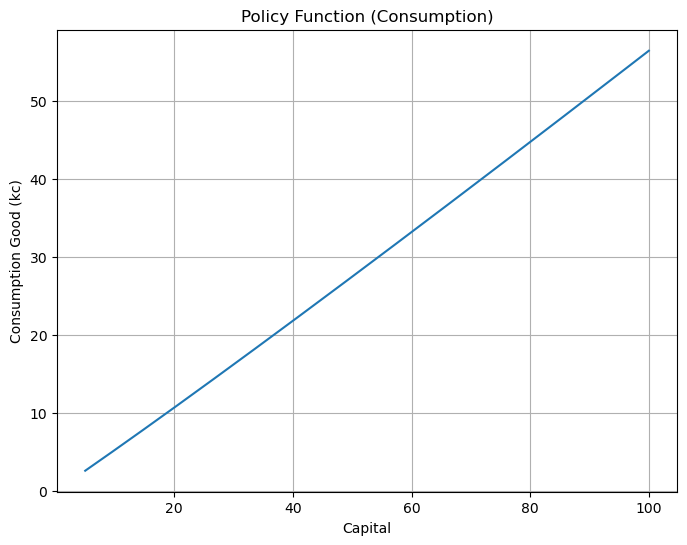

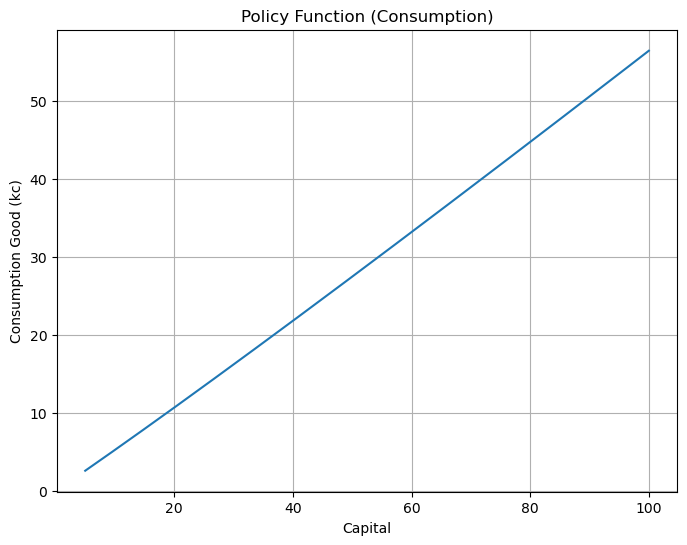

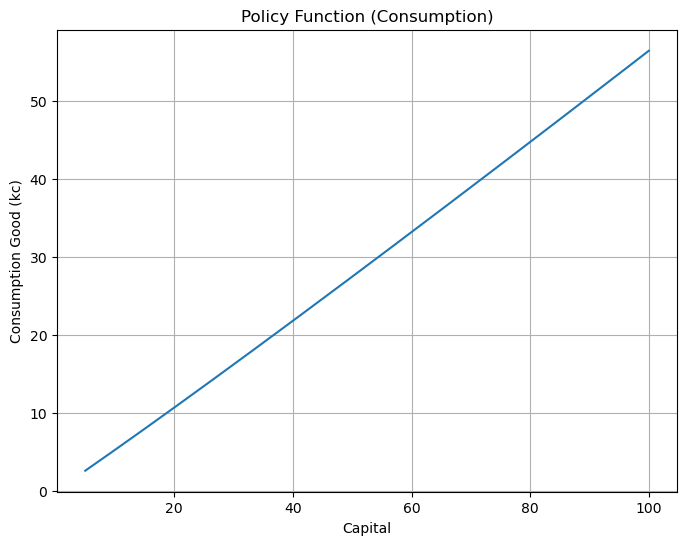

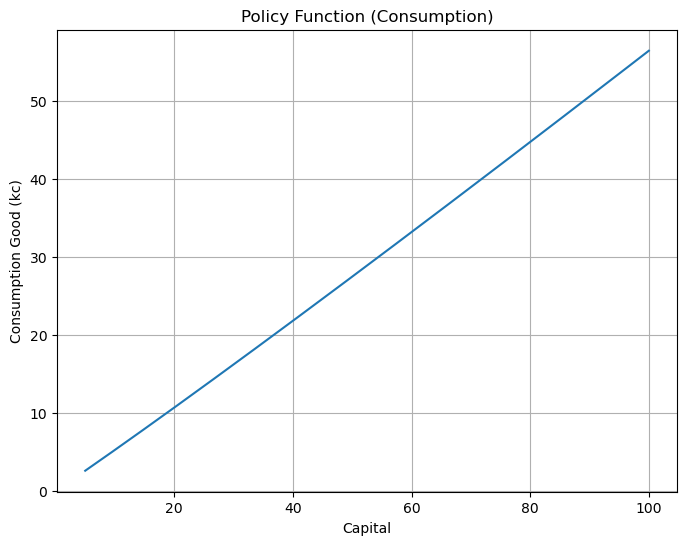

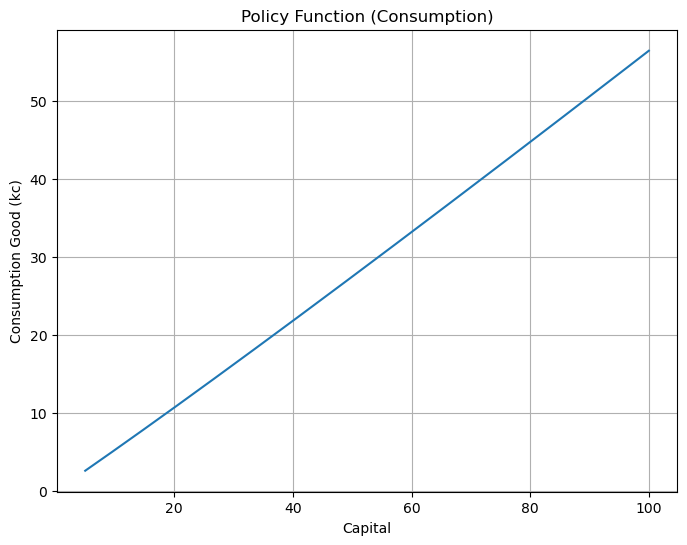

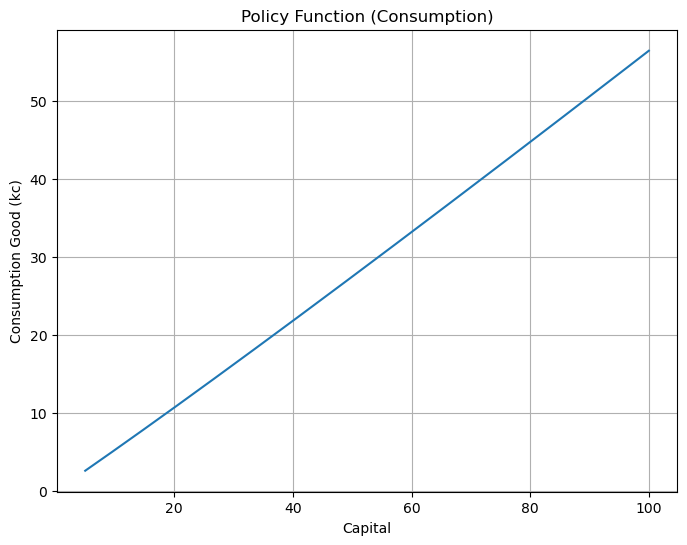

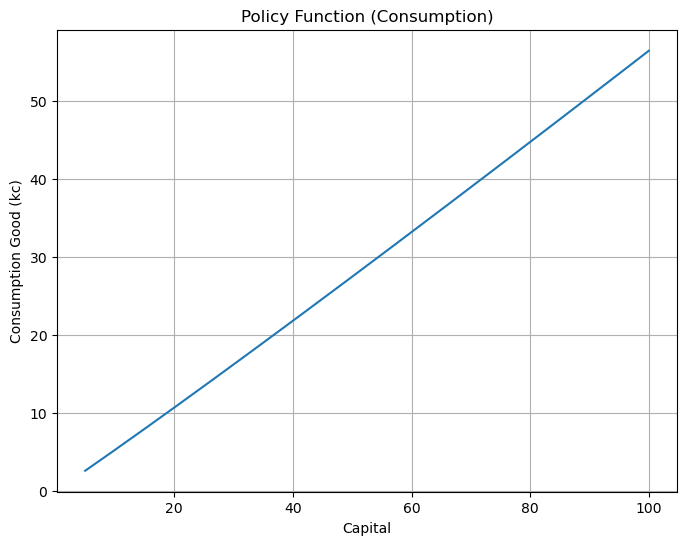

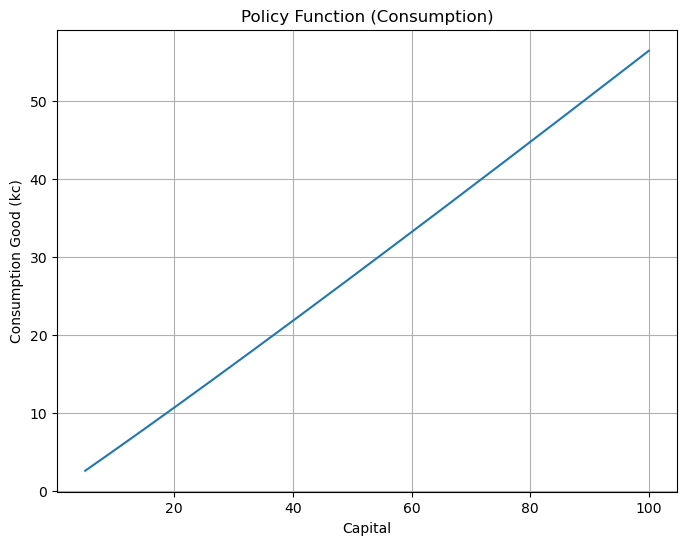

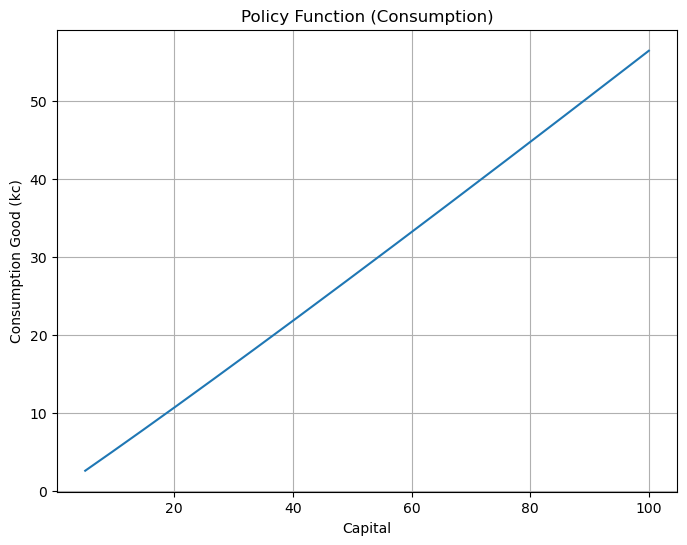

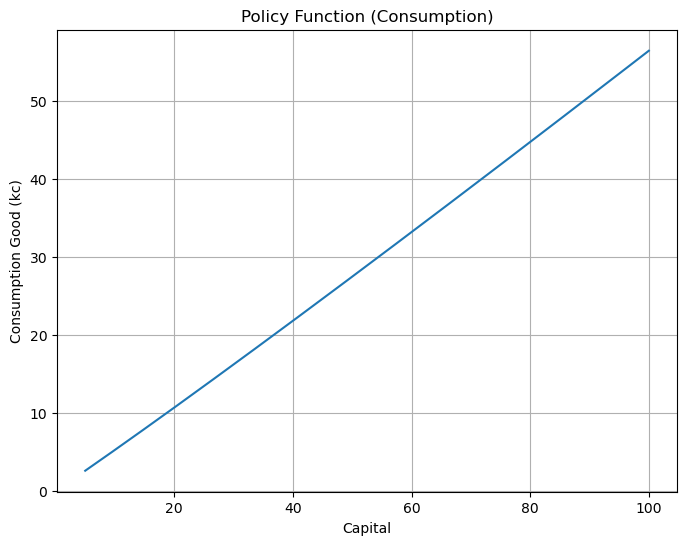

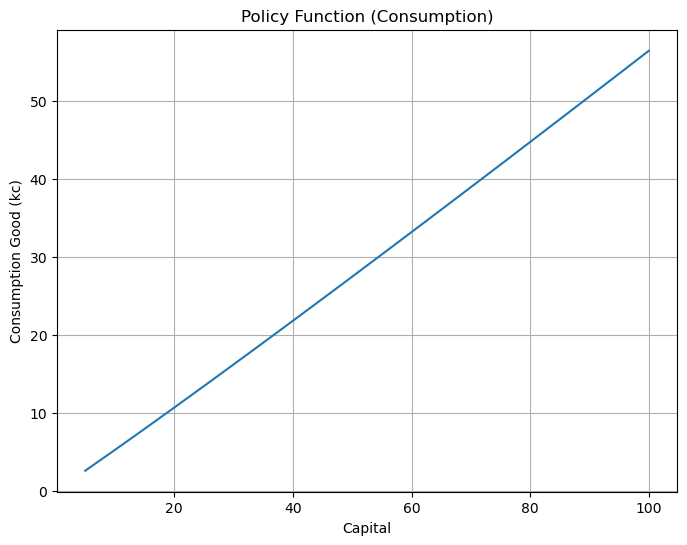

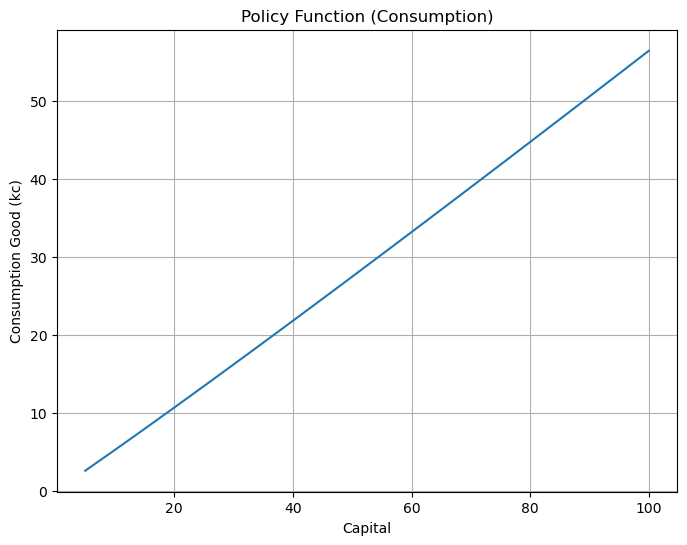

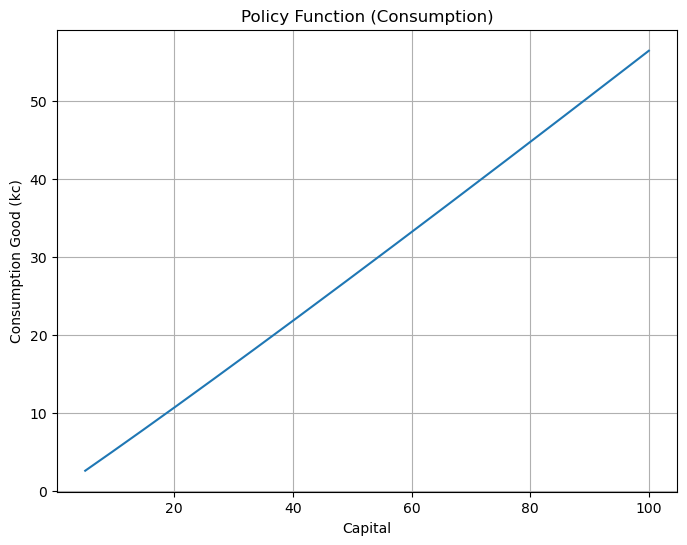

Converged after 123 iterations


In [22]:
# Create the grid for k and define policy function
grid_k = np.linspace(k_l, k_u, grid_res)

# Initialize array for consumption product with steady state
kc = grid_k - (delta*grid_k)**(1/alpha_i)

# Plot policy function
plt.figure(figsize=(8, 6))
plt.plot(grid_k, kc)
plt.title("Policy Function (Consumption)")
plt.xlabel("Capital")
plt.ylabel("Consumption Good (kc)")
plt.grid(True)
plt.show()

# Define the first order condition for the optimal production of conspmution good
def foc(x_in, i, spline_kc):
    # calc future total capital
    x_in = np.clip(x_in, 0.1, grid_k[i])
    k_plus = (1 - delta) * grid_k[i] + (grid_k[i] - x_in)**alpha_i
    # calc future consumption good production
    kc_plus = spline_kc(k_plus)
    kc_plus = np.clip(kc_plus, 0.1, k_plus)
    lhs = (x_in ** alpha_c) ** (-1 / gamma) * x_in ** (alpha_c - 1)
    #rhs = (
    #    beta
    #    * (kc_plus ** alpha_c) ** (-1 / gamma)
    #    * kc_plus ** (alpha_c - 1)
    #    * alpha_i
    #    * (grid_k[i] - x_in) ** (alpha_i - 1)
    #)
    #foc = lhs - rhs
    foc = x_in - (beta * (1-delta + alpha_i * (k_plus - kc_plus) ** (alpha_i-1)) * (x_in / kc_plus) ** (1 - alpha_c) * ((k_plus - kc_plus) / (grid_k[i] - x_in)) ** (1 - alpha_i)) ** (-gamma / alpha_c) * kc_plus
    return foc


# Use timer to measure convergence time
t0 = time.time()     

for it in range(itermax):
    # Interpolate consumption function for spline evaluation
    spline_kc = InterpolatedUnivariateSpline(grid_k, kc, k=3)

    kc_new = np.zeros_like(kc)

    for i in range(len(grid_k)):
        cons_min = 0.1
        cons_max = grid_k[i] #Everything is consumed kcplus = 0
        fa = foc(cons_min, i, spline_kc)
        fb = foc(cons_max, i, spline_kc)
    
        if fa * fb > 0:
            print(f"Warning: No root at grid_k[{i}]={grid_k[i]:.3f}: FOC at min={fa:.3e}, max={fb:.3e}, iteration={it}")
            # fallback: assign the feasible endpoint (often max or min, or previous c[i])
            kc_new[i] = np.clip(kc[i], cons_min, cons_max)
            continue
    
        result = root_scalar(foc, args=(i, spline_kc), bracket=(cons_min, cons_max), method="brentq")
        if not result.converged:
            print(f"Root finding failed at i = {i}")
            kc_new[i] = np.clip(kc[i], cons_min, cons_max)
        else:
            kc_new[i] = result.root

    # Convergence check for the objective function
    con_lev = np.max(np.abs(kc_new - kc) / np.maximum(np.abs(kc), tol))
    if verbose:
        print(f"Iteration {it+1:4d}, Convergence level: {con_lev:12.8f}")

    if con_lev < tol:
        print(f"Converged after {it+1} iterations")
        break

    kc = kc_new.copy()
    # Plot policy function
    plt.figure(figsize=(8, 6))
    plt.plot(grid_k, kc)
    plt.title("Policy Function (Consumption)")
    plt.xlabel("Capital")
    plt.ylabel("Consumption Good (kc)")
    plt.grid(True)
    plt.show()
else:
    print("No convergence")



[10.         11.4057844  12.85002377 14.32426251 15.82082585 17.33277712
 18.85387149 20.37850857 21.90168539 23.41895057 24.92636047 26.42043744
 27.89813056 29.35677881 30.79407666 32.20804217 33.59698732 34.95949062
 36.29437183 37.60066861 38.87761516 40.12462242 41.34126012 42.5272401
 43.68240126 44.80669564 45.90017578 46.9629832  47.99533782 48.99752846
 49.96990404 50.91286575 51.8268598  52.71237099 53.56991674 54.40004183
 55.20331359 55.98031755 56.73165359 57.45793241 58.15977245 58.83779704
 59.49263197 60.12490321 60.73523501 61.32424814 61.89255835 62.44077507
 62.96950021 63.47932718 63.97084003 64.44461268 64.90120833 65.34117894
 65.76506477 66.17339411 66.56668293 66.94543478 67.31014058 67.66127857
 67.99931429 68.32470057 68.63787761 68.93927303 69.229302   69.50836738
 69.77685987 70.0351582  70.28362934 70.52262868 70.75250026 70.97357703
 71.18618106 71.39062381 71.58720634 71.77621961 71.95794473 72.13265318
 72.30060711 72.46205959 72.61725484 72.76642852 72.

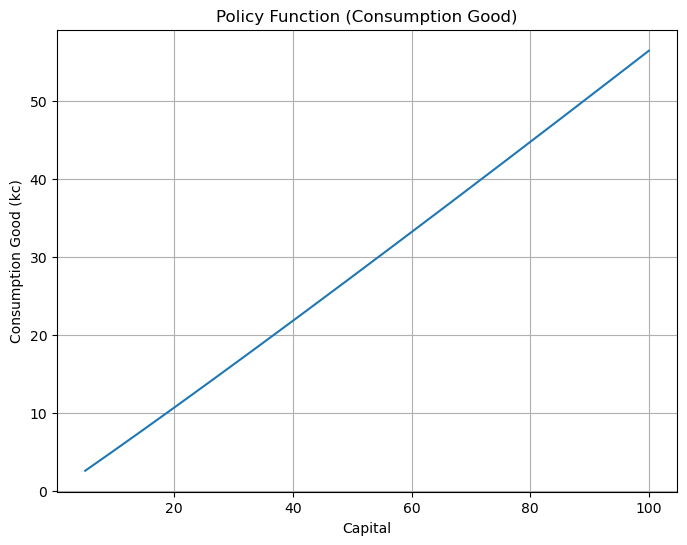

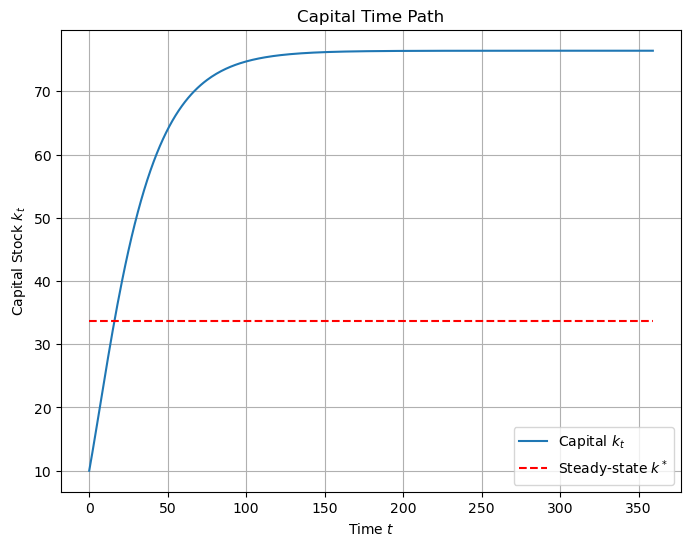

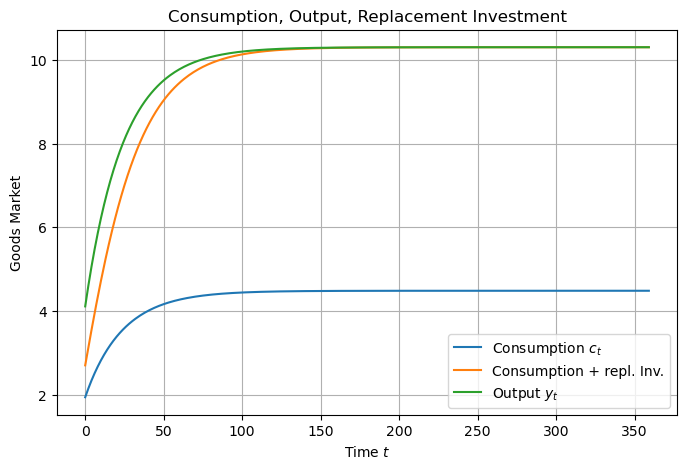

NameError: name 'spline_c' is not defined

In [24]:
# Calculate steady states
theta = 1.0 / beta - 1.0
k_stat = (alpha_i / (delta + theta)) ** (1.0 / (1.0 - alpha_i))
y_stat = k_stat ** alpha_i
c_stat = y_stat - delta * k_stat

# Calculate the time path of consumption and capital numerically
k_t = np.zeros(TT)
kc_t = np.zeros(TT)
c_t = np.zeros(TT)
i_t = np.zeros(TT)
y_t = np.zeros(TT)
k_t[0] = k0
kc_t[0] = spline_kc(k_t[0])
c_t[0] = kc_t[0]**alpha_c
i_t[0] = (k_t[0] - kc_t[0])**alpha_i
y_t[0] = i_t[0] + c_t[0]
for it in range(1, TT):
    k_t[it] = (1 - delta) * k_t[it-1] + (k_t[it-1] - kc_t[it-1])**alpha_i
    kc_t[it] = spline_kc(k_t[it])
    c_t[it] = kc_t[it]**alpha_c
    i_t[it] = (k_t[it] - kc_t[it])**alpha_i
    y_t[it] = i_t[it] + c_t[it]

print(k_t)

# Plot policy function
plt.figure(figsize=(8, 6))
plt.plot(grid_k, kc)
plt.title("Policy Function (Consumption Good)")
plt.xlabel("Capital")
plt.ylabel("Consumption Good (kc)")
plt.grid(True)
plt.show()

# Plot time path of capital
plt.figure(figsize=(8, 6))
plt.plot(range(TT), k_t, label='Capital $k_t$')
plt.plot([0, TT-1], [k_stat, k_stat], 'r--', label='Steady-state $k^*$')
plt.xlabel('Time $t$')
plt.ylabel('Capital Stock $k_t$')
plt.legend()
plt.grid()
plt.title('Capital Time Path')
plt.show()

# Plot time paths for goods market
plt.figure(figsize=(8, 5))
plt.plot(range(TT), c_t, label='Consumption $c_t$')
plt.plot(range(TT), c_t + delta * k_t, label='Consumption + repl. Inv.')
plt.plot(range(TT), y_t, label='Output $y_t$')
plt.xlabel('Time $t$')
plt.ylabel('Goods Market')
plt.legend()
plt.grid()
plt.title('Consumption, Output, Replacement Investment')
plt.show()

# Calculate Euler equation error
err = 0
grid = np.linspace(k_l, k_u, n_err)
c_err = np.zeros(n_err)
for i in range(n_err):
    c_err[i] = spline_c(grid[i])
splines = InterpolatedUnivariateSpline(grid, c_err, k=3)

for ik in range(n_err):
    k_com = k_l + (k_u - k_l) * ik / n_err
    c_err_val = splines(k_com)
    # future capital
    kplus = (1 - delta) * k_com + k_com ** alpha - c_err_val
    # calculate future consumption
    cplus = splines(kplus)
    # get first order condition
    foc = c_err_val - (beta * (1 + alpha * kplus ** (alpha - 1) - delta)) ** (-gamma) * cplus
    err_temp = abs(foc / c_err_val)
    if err_temp > err:
        err = err_temp
print('Euler equation error:', err)